INTRODUCTION

THIS PROJECT IS ABOUT THE NUMBER OF DEATHS CAUSED BY DIFFERENT TYPES OF DISEASES AND OTHER REASONS WORLDWIDE DURING THE PERIOD FROM 1990 TO 2022.

AIM

THE AIM OF THIS PROJECT IS TO IDENTIFY WHICH DISEASE CAUSES THE HIGHEST NUMBER OF DEATHS AND NUMBER OF PEOPLE DIED IN THE WORLD.

IMPORTING THE DEPENDENCIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

IMPORTING THE DATA

In [ ]:
from google.colab import files
files.upload()

READING THE IMPORTED DATA

NAME OF THE DATA IS CALLED AS DEATH_CENSUS

In [ ]:
Death_Census=pd.read_csv('ANNUAL_NUMBER_OF_DEATH_CASE_IN_THE_WORLD.csv')

In [ ]:
print(Death_Census)

          COUNTRY Code  Year Number of executions (Amnesty International)  \
0     Afghanistan  AFG  1990                                          NaN   
1     Afghanistan  AFG  1991                                          NaN   
2     Afghanistan  AFG  1992                                          NaN   
3     Afghanistan  AFG  1993                                          NaN   
4     Afghanistan  AFG  1994                                          NaN   
...           ...  ...   ...                                          ...   
7239     Zimbabwe  ZWE  2018                                          NaN   
7240     Zimbabwe  ZWE  2019                                          NaN   
7241     Zimbabwe  ZWE  2020                                          NaN   
7242     Zimbabwe  ZWE  2021                                          NaN   
7243     Zimbabwe  ZWE  2022                                          NaN   

      Meningitis  Neoplasms  Fire/heat/and/hot_substances   Malaria  \
0   

EXPLORATION OF DATA

In [ ]:
Death_Census.shape

(7244, 37)

In [ ]:
Death_Census.head()

,COUNTRY,Code,Year,Number of executions (Amnesty International),Meningitis,Neoplasms,Fire/heat/and/hot_substances,Malaria,Drowning,Interpersonal violence,...,Terrorism,Corona virus,Cardiovascular diseases,Chronic kidney disease,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,Acute hepatitis,Alzheimer's disease and other dementias,Parkinson's disease
0,Afghanistan,AFG,1990,NaN,2159.0,11580.0,323.0,93.0,1370.0,1538.0,...,12.0,0,44899.0,3709.0,5945.0,2673.0,5005.0,2985.0,1116.0,371.0
1,Afghanistan,AFG,1991,NaN,2218.0,11796.0,332.0,189.0,1391.0,2001.0,...,68.0,0,45492.0,3724.0,6050.0,2728.0,5120.0,3092.0,1136.0,374.0
2,Afghanistan,AFG,1992,NaN,2475.0,12218.0,360.0,239.0,1514.0,2299.0,...,49.0,0,46557.0,3776.0,6223.0,2830.0,5335.0,3325.0,1162.0,378.0
3,Afghanistan,AFG,1993,NaN,2812.0,12634.0,396.0,108.0,1687.0,2589.0,...,NaN,0,47951.0,3862.0,6445.0,2943.0,5568.0,3601.0,1187.0,384.0
4,Afghanistan,AFG,1994,NaN,3027.0,12914.0,420.0,211.0,1809.0,2849.0,...,22.0,0,49308.0,3932.0,6664.0,3027.0,5739.0,3816.0,1211.0,391.0


In [ ]:
Death_Census.tail()

,COUNTRY,Code,Year,Number of executions (Amnesty International),Meningitis,Neoplasms,Fire/heat/and/hot_substances,Malaria,Drowning,Interpersonal violence,...,Terrorism,Corona virus,Cardiovascular diseases,Chronic kidney disease,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,Acute hepatitis,Alzheimer's disease and other dementias,Parkinson's disease
7239,Zimbabwe,ZWE,2018,NaN,1450.0,12038.0,657.0,2088.0,825.0,1396.0,...,NaN,0,17460.0,2240.0,2849.0,2030.0,4377.0,139.0,795.0,227.0
7240,Zimbabwe,ZWE,2019,NaN,1450.0,12353.0,662.0,2068.0,827.0,1434.0,...,NaN,0,17810.0,2292.0,2891.0,2065.0,4437.0,136.0,812.0,232.0
7241,Zimbabwe,ZWE,2020,NaN,1450.0,12668.0,667.0,2048.0,829.0,1472.0,...,NaN,36,18160.0,2344.0,2933.0,2100.0,4497.0,133.0,829.0,237.0
7242,Zimbabwe,ZWE,2021,NaN,1450.0,12983.0,672.0,2028.0,831.0,1510.0,...,NaN,0,18510.0,2396.0,2975.0,2135.0,4557.0,130.0,846.0,242.0
7243,Zimbabwe,ZWE,2022,NaN,1450.0,13298.0,677.0,2008.0,833.0,1548.0,...,NaN,0,18860.0,2448.0,3017.0,2170.0,4617.0,127.0,863.0,247.0


In [ ]:
Death_Census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7244 entries, 0 to 7243
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   COUNTRY                                       7244 non-null   object 
 1   Code                                          6818 non-null   object 
 2   Year                                          7244 non-null   int64  
 3   Number of executions (Amnesty International)  257 non-null    object 
 4   Meningitis                                    7095 non-null   float64
 5   Neoplasms                                     7095 non-null   float64
 6   Fire/heat/and/hot_substances                  7095 non-null   float64
 7   Malaria                                       7095 non-null   float64
 8    Drowning                                     7095 non-null   float64
 9   Interpersonal violence                        7095 non-null   f

In [ ]:
Death_Census.describe()

,Year,Meningitis,Neoplasms,Fire/heat/and/hot_substances,Malaria,Drowning,Interpersonal violence,HIV/AIDS,Drug use disorders,Tuberculosis,...,Terrorism,Corona virus,Cardiovascular diseases,Chronic kidney disease,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,Acute hepatitis,Alzheimer's disease and other dementias,Parkinson's disease
count,7244.000000,7095.000000,7.095000e+03,7095.000000,7095.000000,7095.000000,7095.000000,7095.000000,7095.000000,7095.000000,...,2629.000000,7244.000000,7.095000e+03,7095.000000,7.095000e+03,7095.000000,7095.000000,7095.000000,7095.000000,7095.000000
mean,2005.910547,1650.276533,3.853585e+04,621.345314,3903.364623,1645.116843,2102.983087,5565.537139,453.225229,7062.219168,...,174.038798,92.120237,7.337118e+04,5006.141367,1.703827e+04,6152.349965,10806.295419,612.246794,5317.913319,1268.231149
std,9.510351,6336.034780,1.643792e+05,2131.597181,17724.812298,8419.881121,6822.272484,19915.682761,3086.481495,37744.117916,...,777.972929,2327.530853,2.959889e+05,16996.214343,1.036115e+05,20580.750775,36839.724886,3970.174208,19387.703274,4823.959373
min,1990.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,-77.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1998.000000,16.000000,1.025500e+03,18.000000,0.000000,34.000000,42.000000,12.000000,4.000000,36.000000,...,0.000000,0.000000,2.318000e+03,187.000000,3.255000e+02,180.000000,352.000000,2.000000,111.500000,33.000000
50%,2006.000000,113.000000,6.072000e+03,131.000000,0.000000,185.000000,289.000000,147.000000,26.000000,424.000000,...,4.000000,0.000000,1.222700e+04,931.000000,1.914000e+03,1277.000000,2308.000000,16.000000,757.000000,189.000000
75%,2014.000000,858.000000,2.079450e+04,480.000000,447.500000,723.000000,925.000000,2029.500000,153.500000,2824.000000,...,41.000000,0.000000,4.336450e+04,3397.500000,6.045000e+03,3796.500000,6469.500000,154.000000,2900.000000,714.000000
max,2022.000000,98358.000000,3.002238e+06,27310.000000,280604.000000,153773.000000,78412.000000,305491.000000,74255.000000,657515.000000,...,13965.000000,148011.000000,4.959357e+06,243061.000000,1.366039e+06,283834.000000,486673.000000,64305.000000,362619.000000,86593.000000


In [ ]:
Death_Census.value_counts()

COUNTRY      Code  Year  Number of executions (Amnesty International)  Meningitis  Neoplasms  Fire/heat/and/hot_substances   Malaria   Drowning  Interpersonal violence  HIV/AIDS  Drug use disorders  Tuberculosis  Road injuries  Maternal disorders  Lower respiratory infections  Neonatal disorders  Alcohol use disorders  Exposure to forces of nature  Diarrheal diseases  Environmental heat and cold exposure  Nutritional deficiencies  Self-harm  Conflict and terrorism  Diabetes mellitus  Poisonings  Protein-energy malnutrition  Terrorism  Corona virus  Cardiovascular diseases  Chronic kidney disease  Chronic respiratory diseases  Cirrhosis and other chronic liver diseases  Digestive diseases  Acute hepatitis  Alzheimer's disease and other dementias  Parkinson's disease
Afghanistan  AFG   2007  15                                            2933.0      15925.0    481.0                          393.0    2127.0     3657.0                  148.0     252.0               4995.0        7425.0     

CHECKING WHETHER THERE ARE NULL VALUES OR NOT

In [ ]:
Death_Census.isnull().sum()

COUNTRY                                            0
Code                                             426
Year                                               0
Number of executions (Amnesty International)    6987
Meningitis                                       149
Neoplasms                                        149
Fire/heat/and/hot_substances                     149
Malaria                                          149
 Drowning                                        149
Interpersonal violence                           149
HIV/AIDS                                         149
Drug use disorders                               149
Tuberculosis                                     149
Road injuries                                    149
Maternal disorders                               149
Lower respiratory infections                     149
Neonatal disorders                               149
Alcohol use disorders                            149
Exposure to forces of nature                  

REMOVING THE NULL VALUES BY LEAVING THE NULLED CELLS AS SUCH FOR FUTURE ADDITION OF DATA AND THE DATA IS RENAMED AS DEATH_CENSUS_DATA

In [ ]:
Death_Census_Data = Death_Census.where((pd.notnull(Death_Census)),'')

In [ ]:
Death_Census_Data.isnull().sum()

COUNTRY                                         0
Code                                            0
Year                                            0
Number of executions (Amnesty International)    0
Meningitis                                      0
Neoplasms                                       0
Fire/heat/and/hot_substances                    0
Malaria                                         0
 Drowning                                       0
Interpersonal violence                          0
HIV/AIDS                                        0
Drug use disorders                              0
Tuberculosis                                    0
Road injuries                                   0
Maternal disorders                              0
Lower respiratory infections                    0
Neonatal disorders                              0
Alcohol use disorders                           0
Exposure to forces of nature                    0
Diarrheal diseases                              0


REMOVING THE NON NUMERIC ERROR

In [ ]:
Death_Census_Data=Death_Census_Data.apply(pd.to_numeric,errors='coerce')

In [ ]:
Death_Census_Data= Death_Census_Data.rename(columns=lambda x: x.strip())
Death_Census_Data['Number of executions (Amnesty International)'] = pd.to_numeric(Death_Census_Data['Number of executions (Amnesty International)'], errors='coerce')

In [ ]:
Death_Census_Data['Diarrheal diseases'] = pd.to_numeric(Death_Census_Data['Diarrheal diseases'], errors='coerce')

RENAMING THE COLUMNS

In [ ]:
Death_Census_Data.rename(columns = {' Drowning':'Drowning'}, inplace = True)

In [ ]:
Death_Census_Data.rename(columns = {'Conflict and terrorism':'Conflict_and_terrorism'}, inplace = True)

REMOVING THE NAN VALUE FROM THE COLUMN

In [ ]:
Death_Census_Data = Death_Census_Data.dropna(subset=['Number of executions (Amnesty International)'])
Death_Census_Data = Death_Census_Data.dropna(subset=['Terrorism'])

LABEL ENCODING THE COLUMN

In [ ]:
encoder=LabelEncoder()
Death_Census_Data['Diarrheal diseases']=encoder.fit_transform(Death_Census_Data['Diarrheal diseases'])

DISTPLOT OF COLUMNS

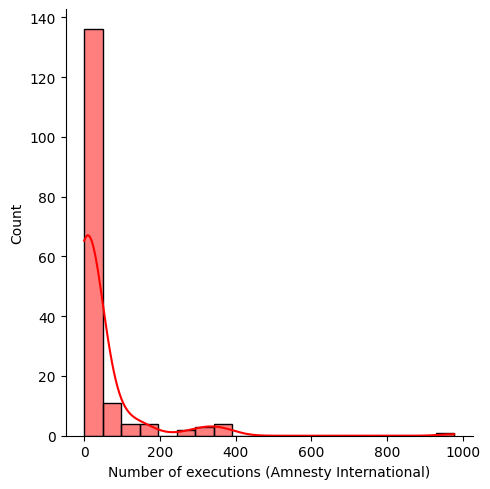

In [ ]:
sns.displot(x="Number of executions (Amnesty International)",data=Death_Census_Data,bins=20,color='red',kde=True)

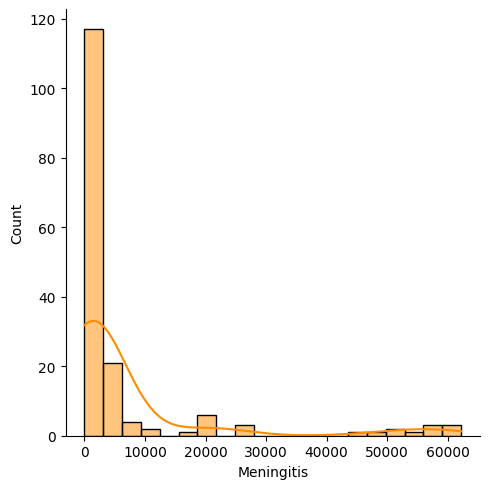

In [ ]:
sns.displot(x="Meningitis",data=Death_Census_Data,bins=20,color='darkorange',kde=True)

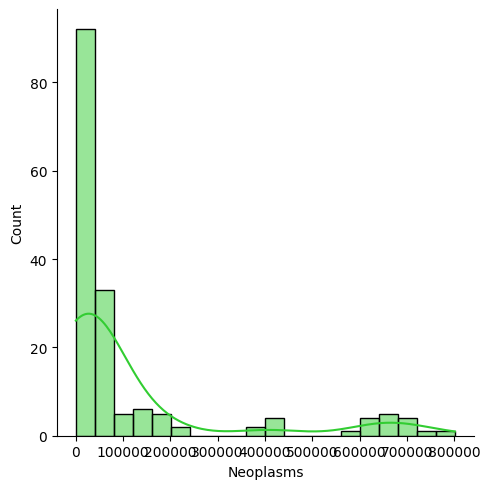

In [ ]:
sns.displot(x="Neoplasms",data=Death_Census_Data,bins=20,color='limegreen',kde=True)

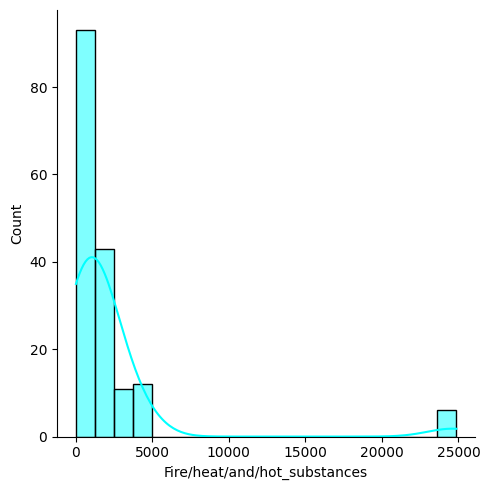

In [ ]:
sns.displot(x="Fire/heat/and/hot_substances",data=Death_Census_Data,bins=20,color='aqua',kde=True)

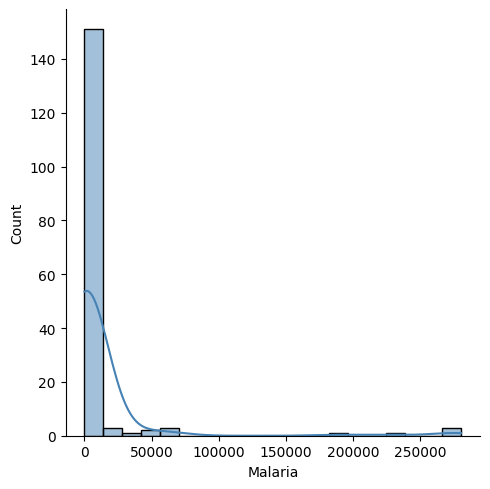

In [ ]:
sns.displot(x="Malaria",data=Death_Census_Data,bins=20,color='steelblue',kde=True)

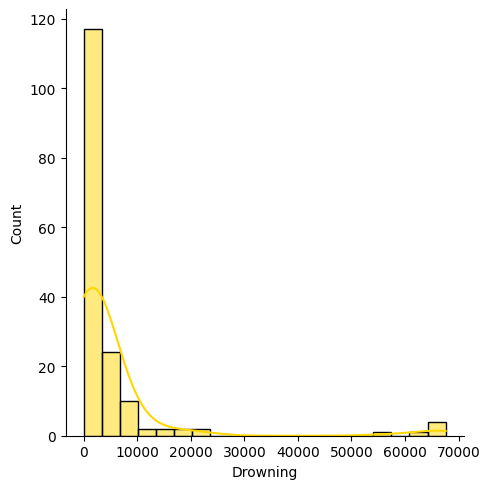

In [ ]:
sns.displot(x="Drowning",data=Death_Census_Data,bins=20,color='gold',kde=True)

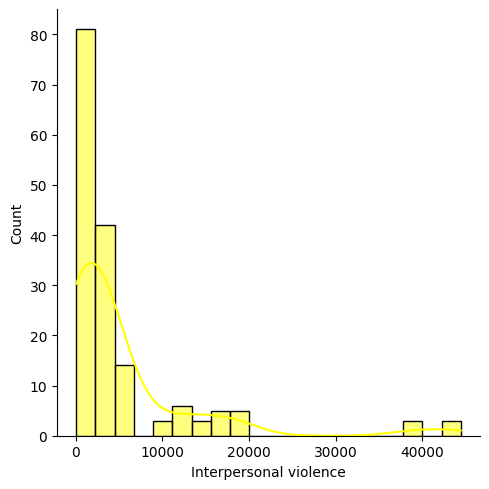

In [ ]:
sns.displot(x="Interpersonal violence",data=Death_Census_Data,bins=20,color='yellow',kde=True)

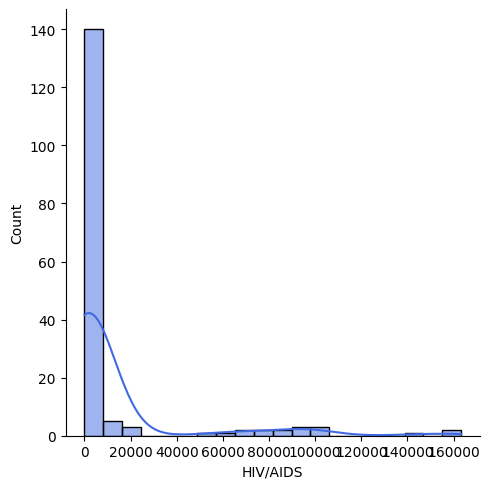

In [ ]:
sns.displot(x="HIV/AIDS",data=Death_Census_Data,bins=20,color='royalblue',kde=True)

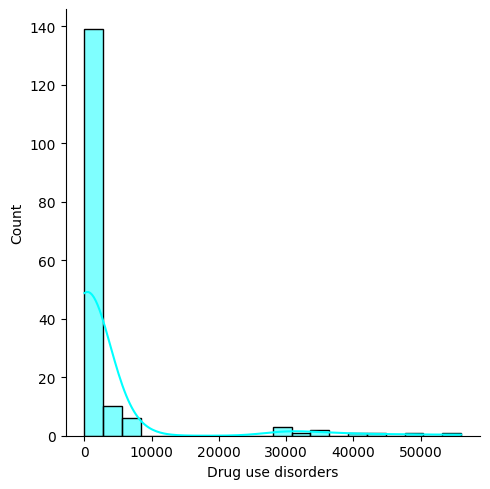

In [ ]:
sns.displot(x="Drug use disorders",data=Death_Census_Data,bins=20,color='cyan',kde=True)

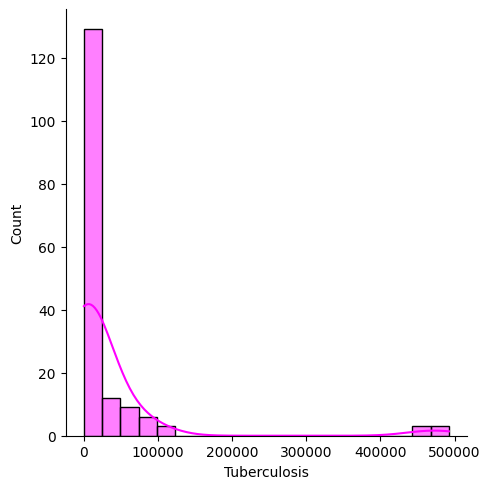

In [ ]:
sns.displot(x="Tuberculosis",data=Death_Census_Data,bins=20,color='fuchsia',kde=True)

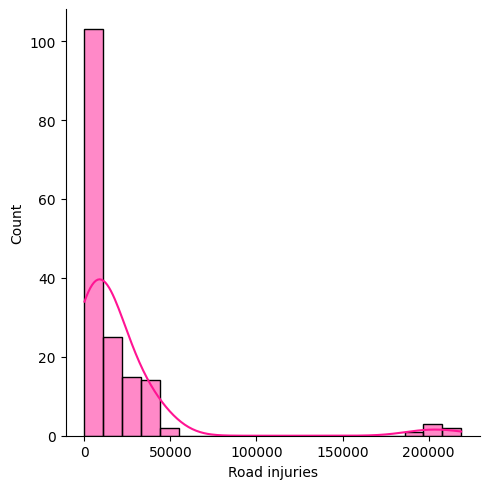

In [ ]:
sns.displot(x="Road injuries",data=Death_Census_Data,bins=20,color='deeppink',kde=True)

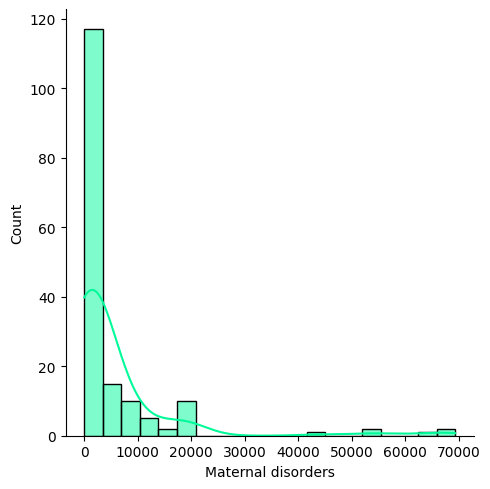

In [ ]:
sns.displot(x="Maternal disorders",data=Death_Census_Data,bins=20,color='mediumspringgreen',kde=True)

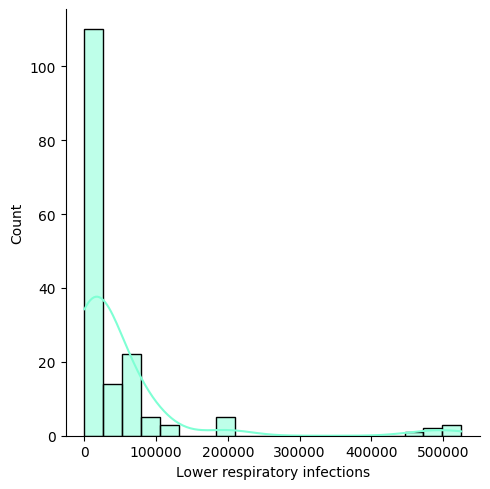

In [ ]:
sns.displot(x="Lower respiratory infections",data=Death_Census_Data,bins=20,color='aquamarine',kde=True)

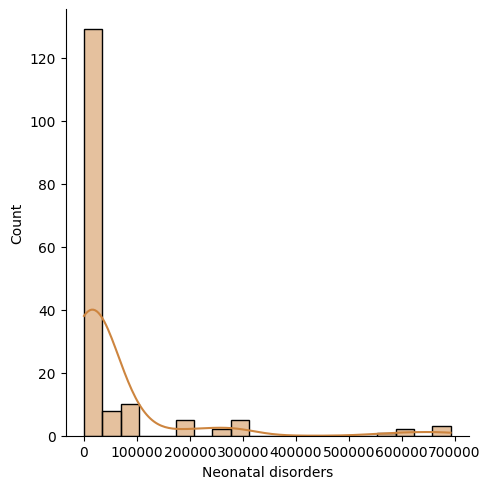

In [ ]:
sns.displot(x="Neonatal disorders",data=Death_Census_Data,bins=20,color='peru',kde=True)

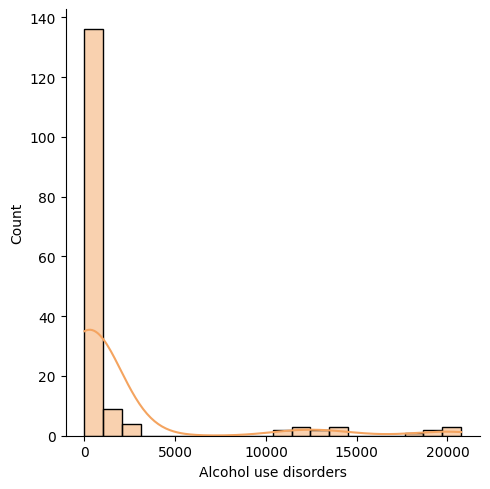

In [ ]:
sns.displot(x="Alcohol use disorders",data=Death_Census_Data,bins=20,color='sandybrown',kde=True)

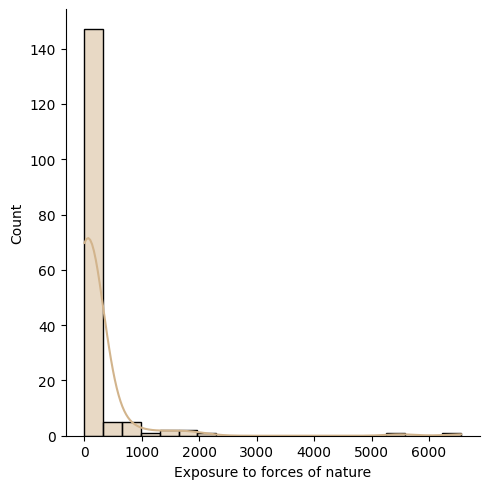

In [ ]:
sns.displot(x="Exposure to forces of nature",data=Death_Census_Data,bins=20,color='tan',kde=True)

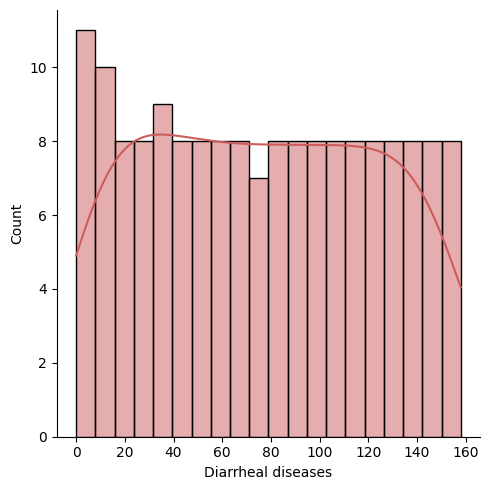

In [ ]:
sns.displot(x="Diarrheal diseases",data=Death_Census_Data,bins=20,color='indianred',kde=True)

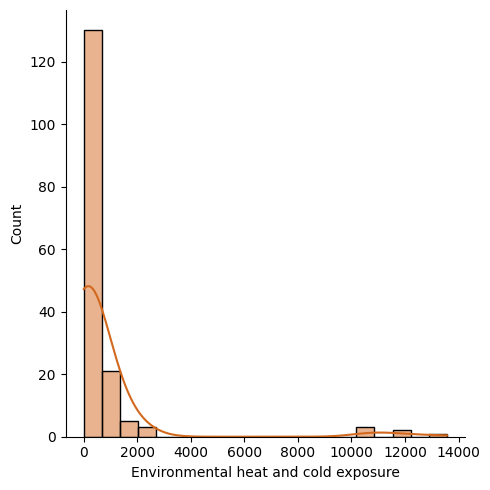

In [ ]:
sns.displot(x="Environmental heat and cold exposure",data=Death_Census_Data,bins=20,color='chocolate',kde=True)

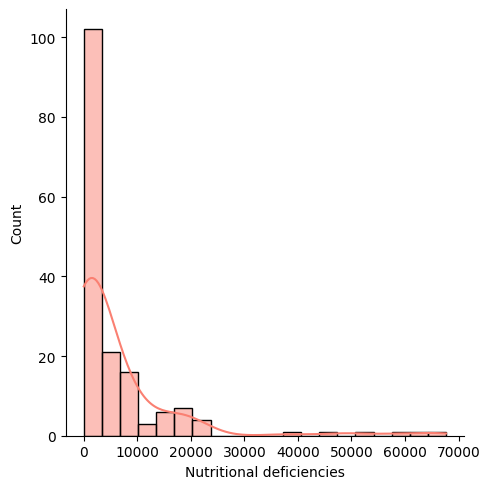

In [ ]:
sns.displot(x="Nutritional deficiencies",data=Death_Census_Data,bins=20,color='salmon',kde=True)

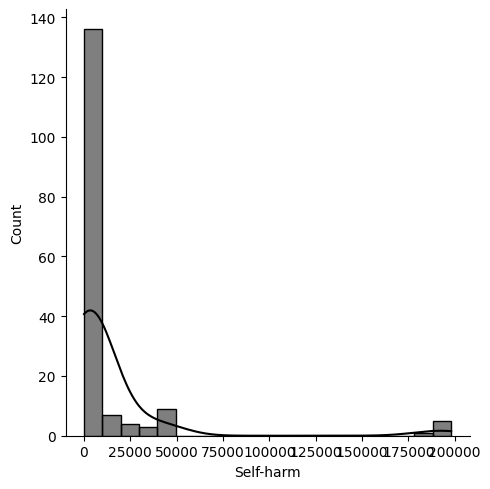

In [ ]:
sns.displot(x="Self-harm",data=Death_Census_Data,bins=20,color='black',kde=True)

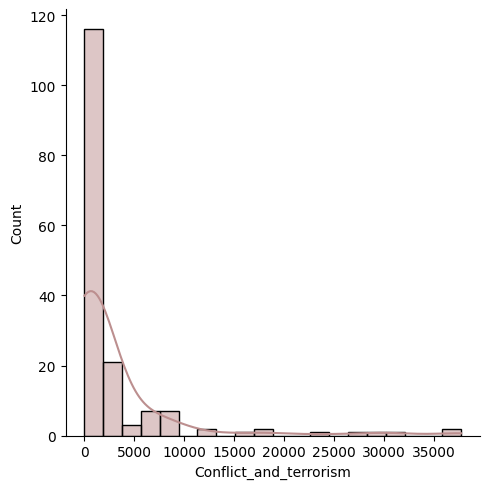

In [ ]:
sns.displot(x="Conflict_and_terrorism",data=Death_Census_Data,bins=20,color='rosybrown',kde=True)

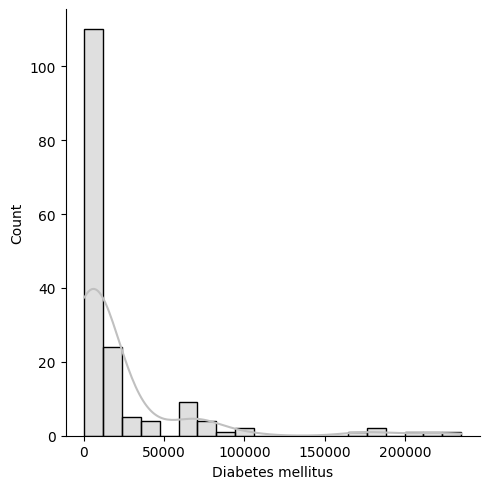

In [ ]:
sns.displot(x="Diabetes mellitus",data=Death_Census_Data,bins=20,color='silver',kde=True)

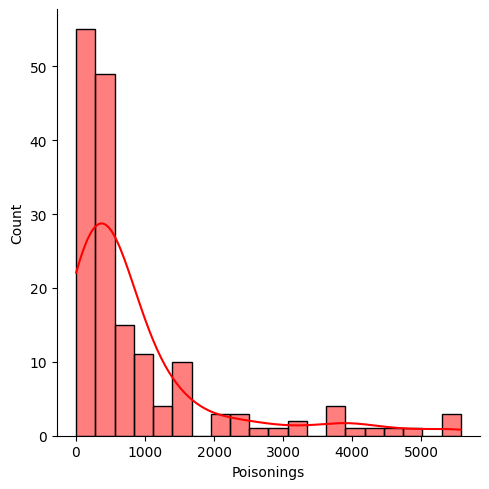

In [ ]:
sns.displot(x="Poisonings",data=Death_Census_Data,bins=20,color='red',kde=True)

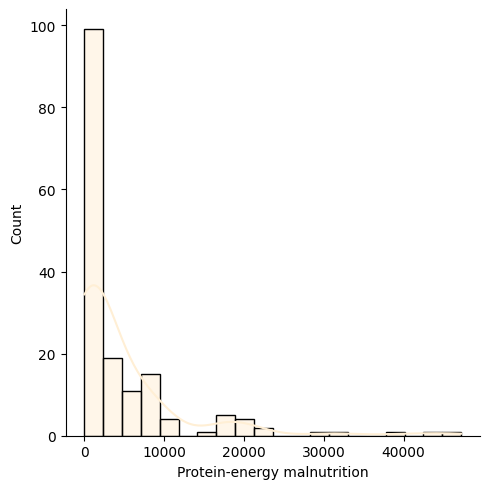

In [ ]:
sns.displot(x="Protein-energy malnutrition",data=Death_Census_Data,bins=20,color='papayawhip',kde=True)

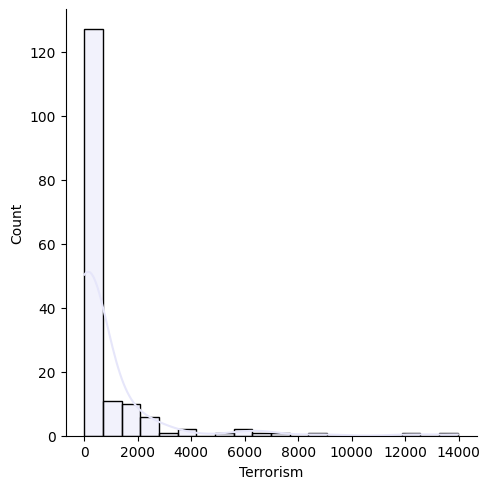

In [ ]:
sns.displot(x="Terrorism",data=Death_Census_Data,bins=20,color='lavender',kde=True)

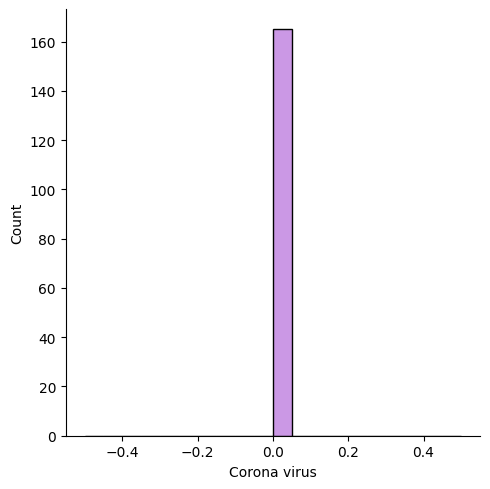

In [ ]:
sns.displot(x="Corona virus",data=Death_Census_Data,bins=20,color='darkorchid',kde=True)

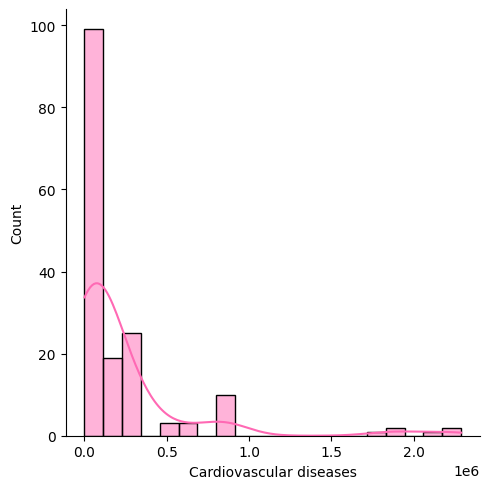

In [ ]:
sns.displot(x="Cardiovascular diseases",data=Death_Census_Data,bins=20,color='hotpink',kde=True)

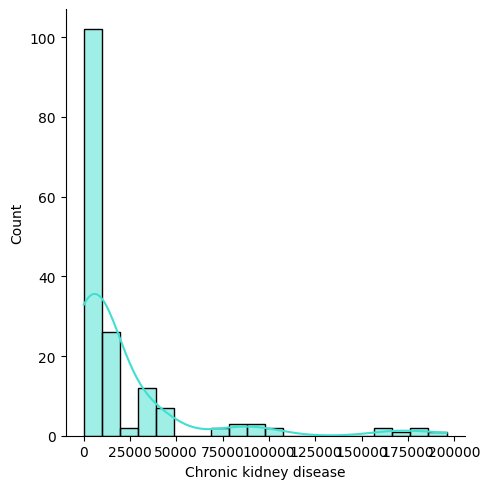

In [ ]:
sns.displot(x="Chronic kidney disease",data=Death_Census_Data,bins=20,color='turquoise',kde=True)

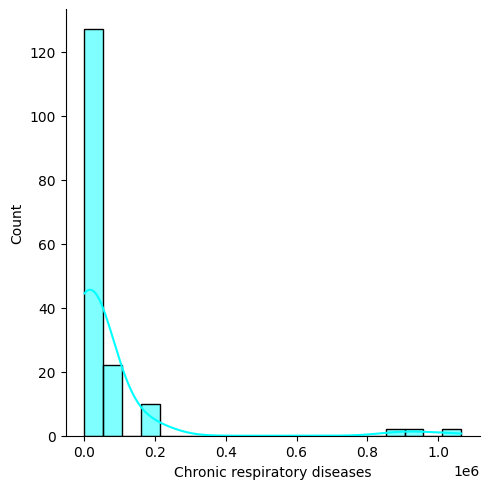

In [ ]:
sns.displot(x="Chronic respiratory diseases",data=Death_Census_Data,bins=20,color='cyan',kde=True)

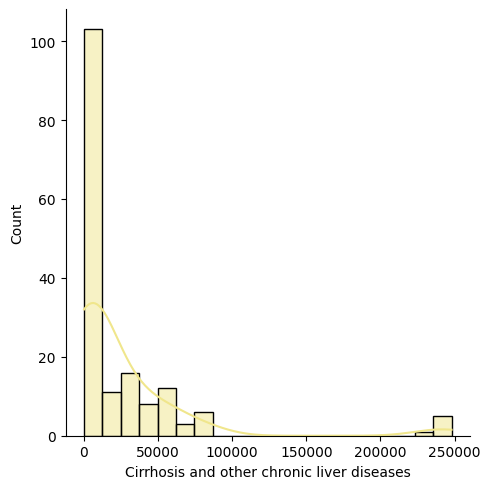

In [ ]:
sns.displot(x="Cirrhosis and other chronic liver diseases",data=Death_Census_Data,bins=20,color='khaki',kde=True)

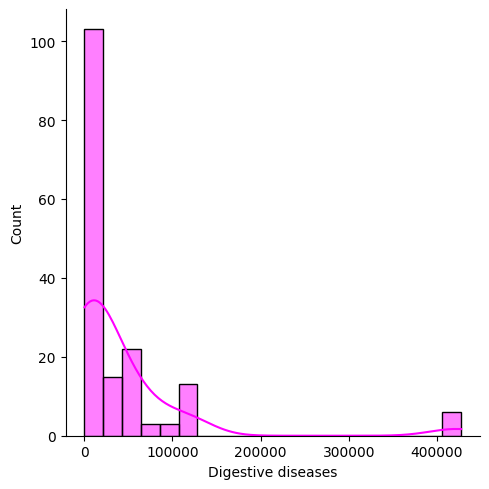

In [ ]:
sns.displot(x="Digestive diseases",data=Death_Census_Data,bins=20,color='magenta',kde=True)

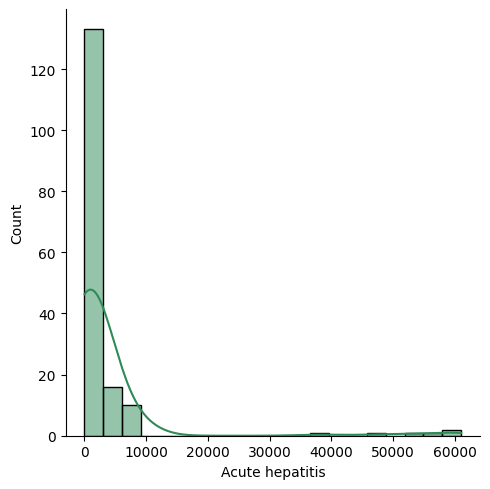

In [ ]:
sns.displot(x="Acute hepatitis",data=Death_Census_Data,bins=20,color='seagreen',kde=True)

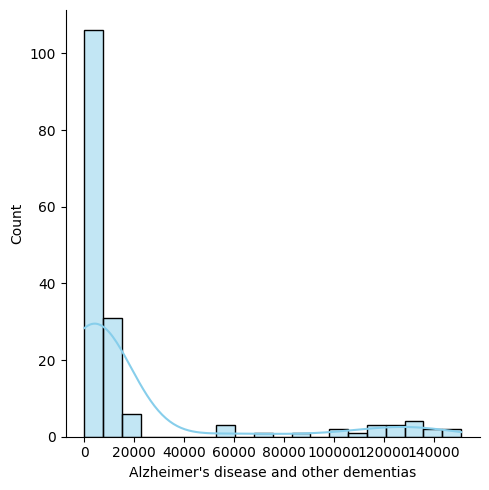

In [ ]:
sns.displot(x="Alzheimer's disease and other dementias",data=Death_Census_Data,bins=20,color='skyblue',kde=True)

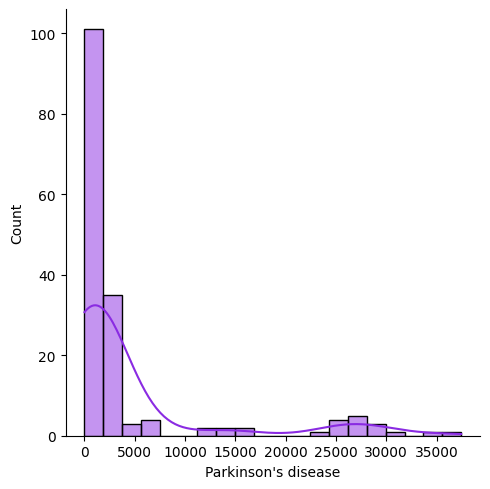

In [ ]:
sns.displot(x="Parkinson's disease",data=Death_Census_Data,bins=20,color='blueviolet',kde=True)

CHECKING OF OUTLIERS

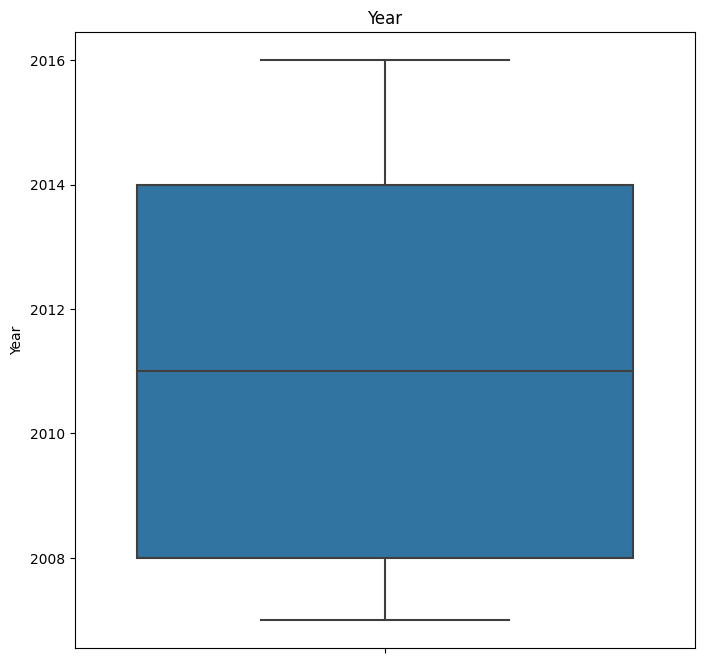

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Year',data=Death_Census_Data)
plt.title('Year')
plt.show()

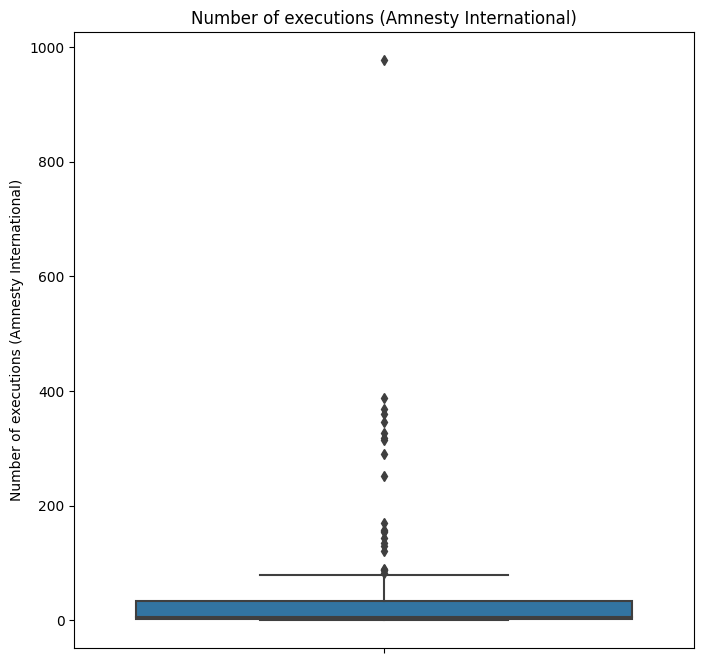

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Number of executions (Amnesty International)',data=Death_Census_Data)
plt.title('Number of executions (Amnesty International)')
plt.show()

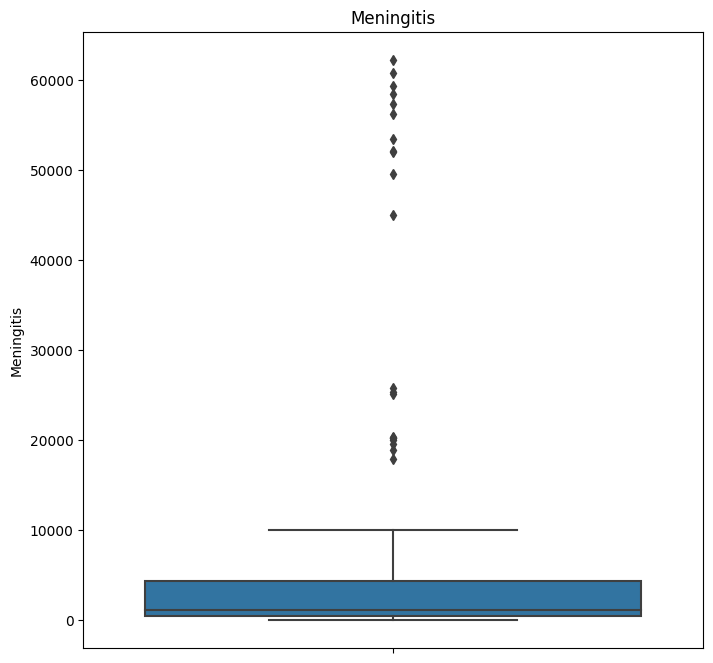

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Meningitis',data=Death_Census_Data)
plt.title('Meningitis')
plt.show()

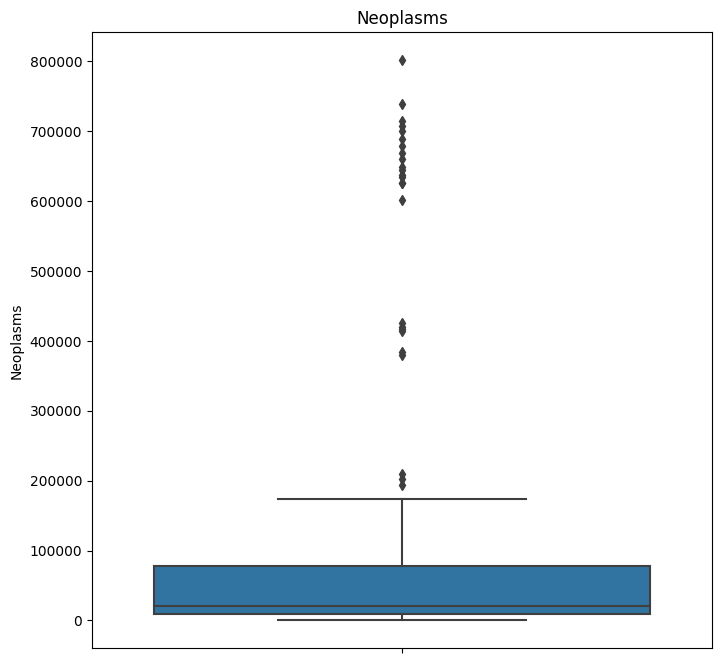

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Neoplasms',data=Death_Census_Data)
plt.title('Neoplasms')
plt.show()

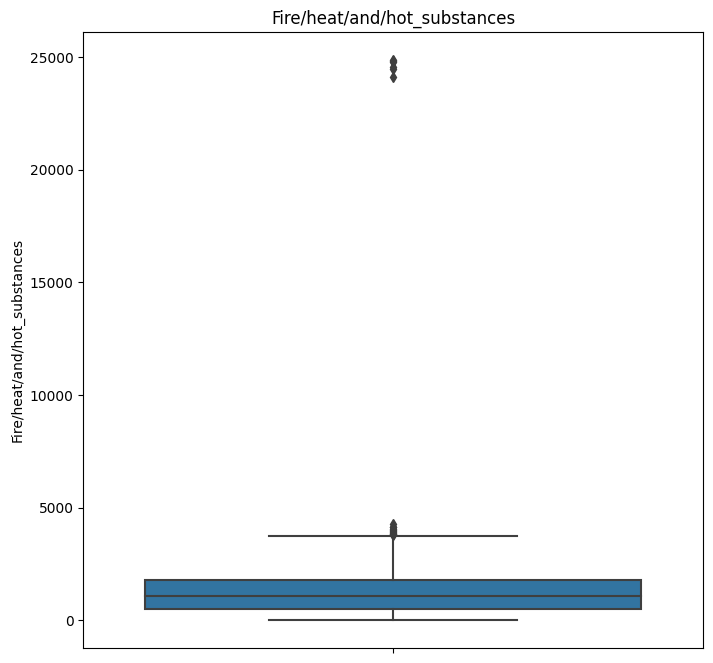

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Fire/heat/and/hot_substances',data=Death_Census_Data)
plt.title('Fire/heat/and/hot_substances')
plt.show()

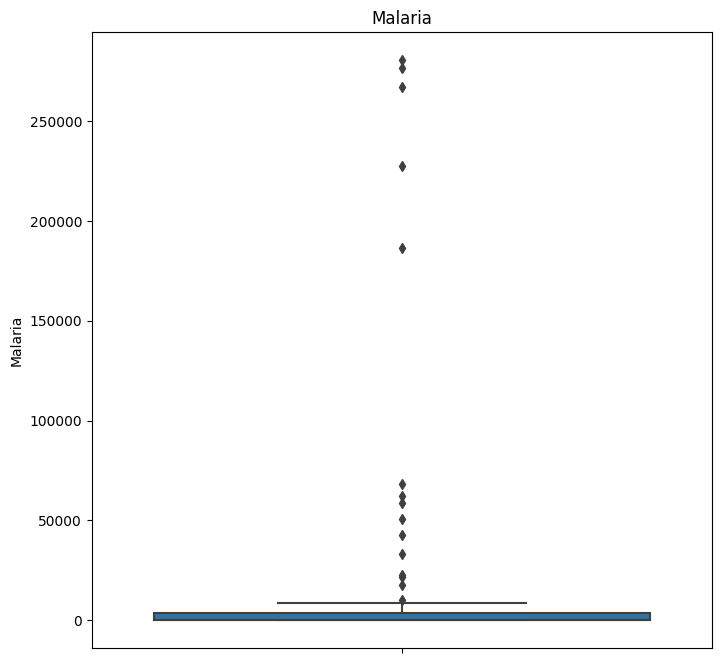

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Malaria',data=Death_Census_Data)
plt.title('Malaria')
plt.show()

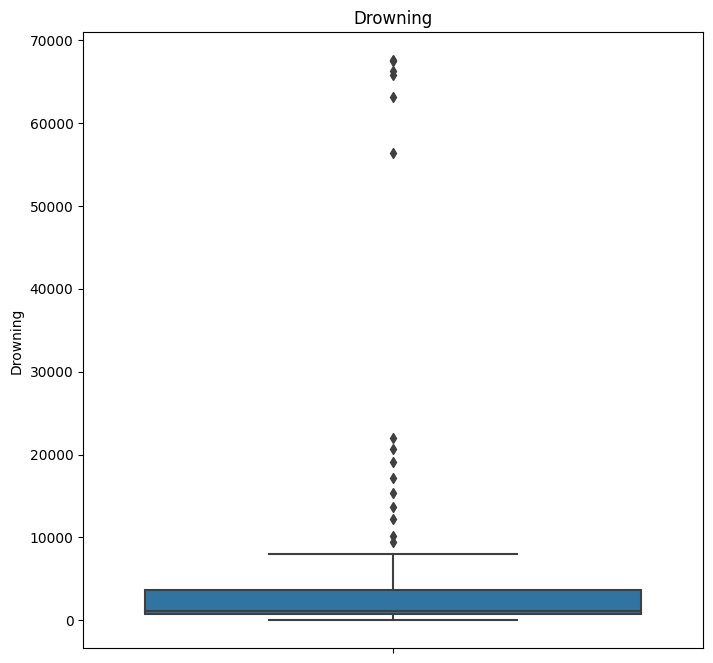

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Drowning',data=Death_Census_Data)
plt.title('Drowning')
plt.show()

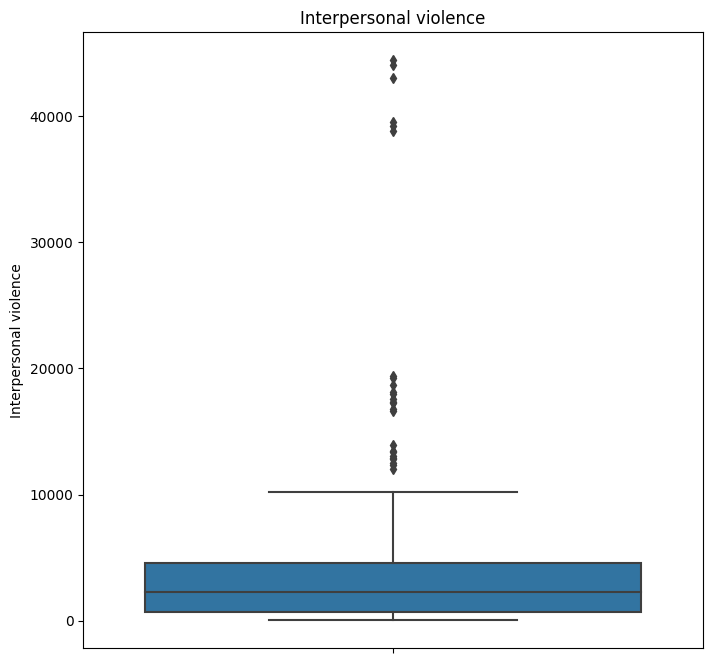

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Interpersonal violence',data=Death_Census_Data)
plt.title('Interpersonal violence')
plt.show()

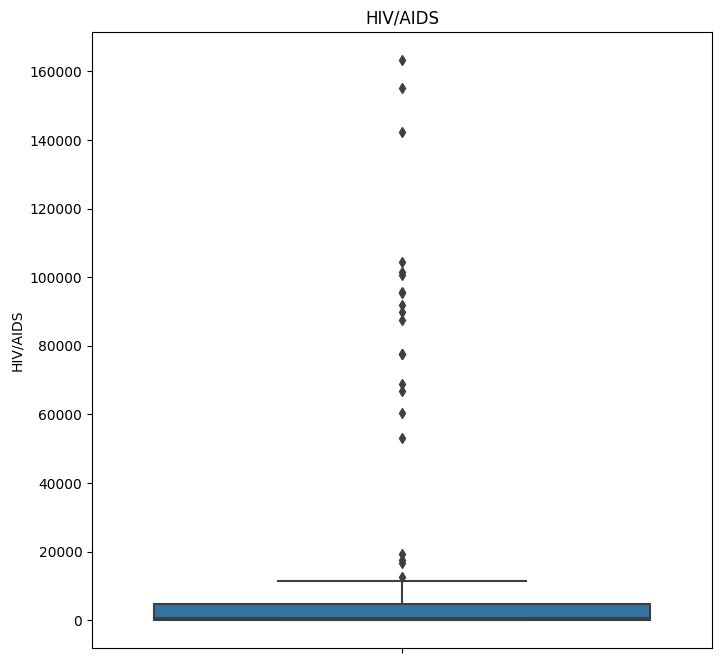

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='HIV/AIDS',data=Death_Census_Data)
plt.title('HIV/AIDS')
plt.show()

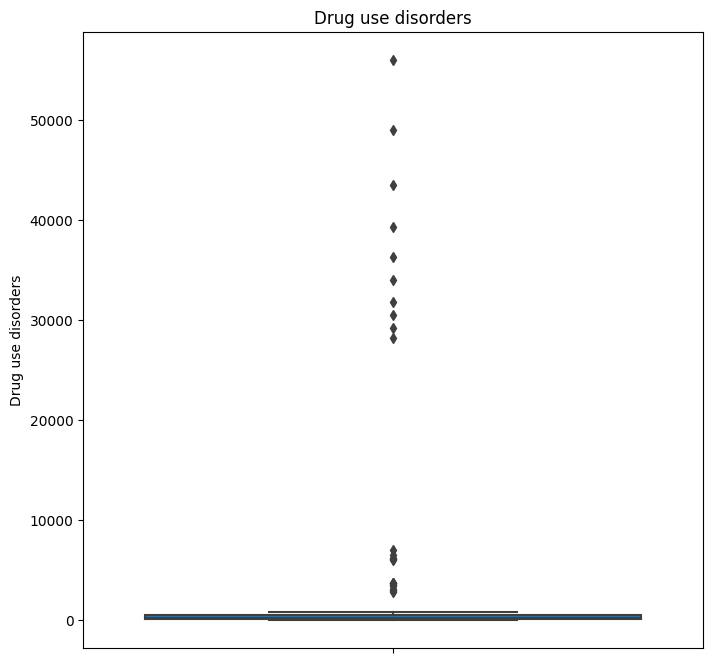

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Drug use disorders',data=Death_Census_Data)
plt.title('Drug use disorders')
plt.show()

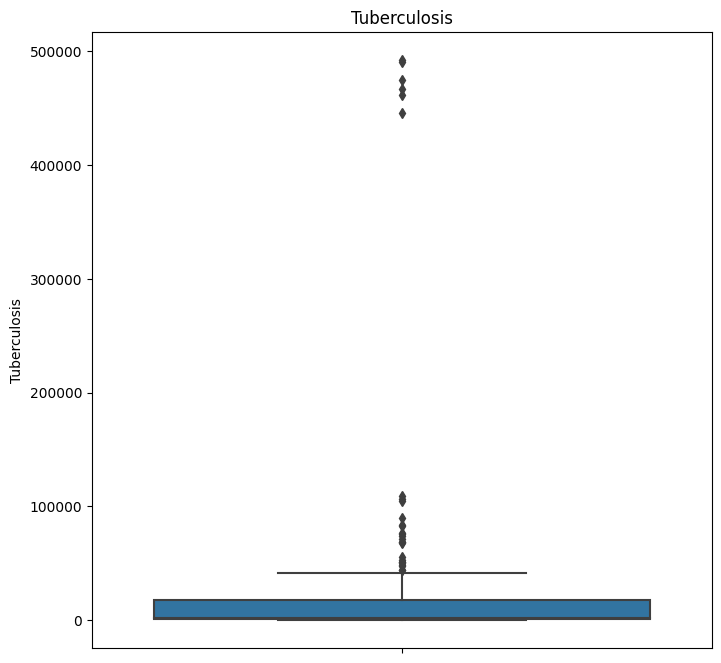

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Tuberculosis',data=Death_Census_Data)
plt.title('Tuberculosis')
plt.show()

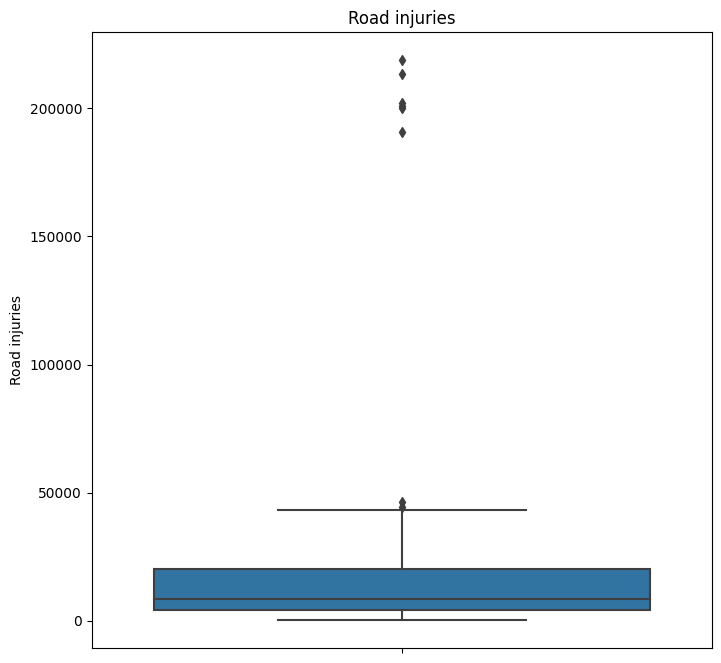

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Road injuries',data=Death_Census_Data)
plt.title('Road injuries')
plt.show()

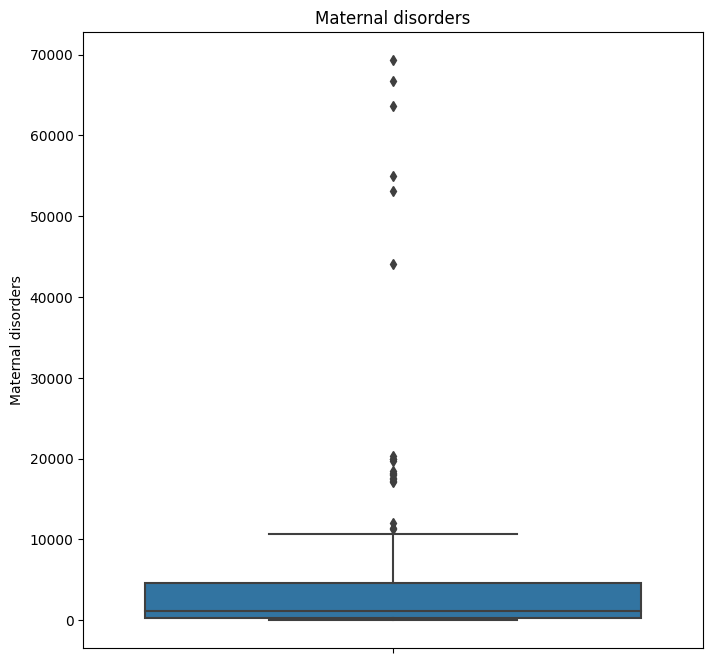

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Maternal disorders',data=Death_Census_Data)
plt.title('Maternal disorders')
plt.show()

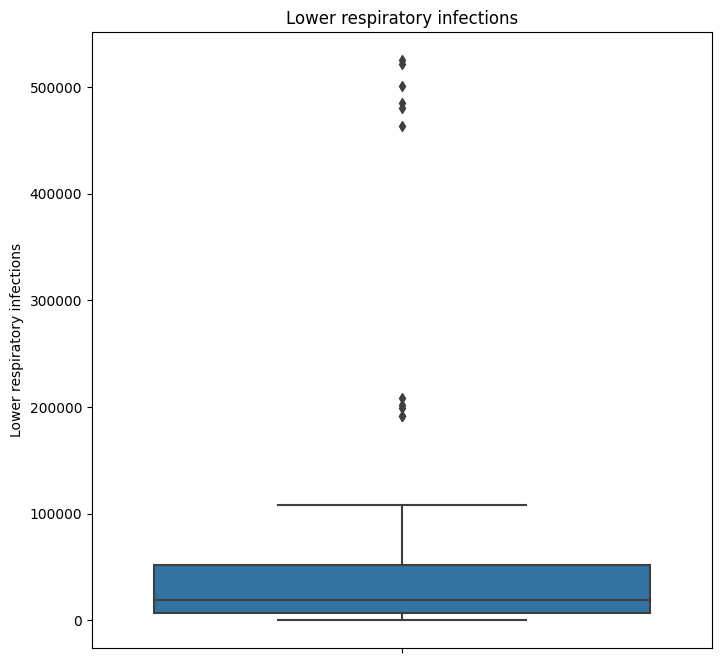

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Lower respiratory infections',data=Death_Census_Data)
plt.title('Lower respiratory infections')
plt.show()

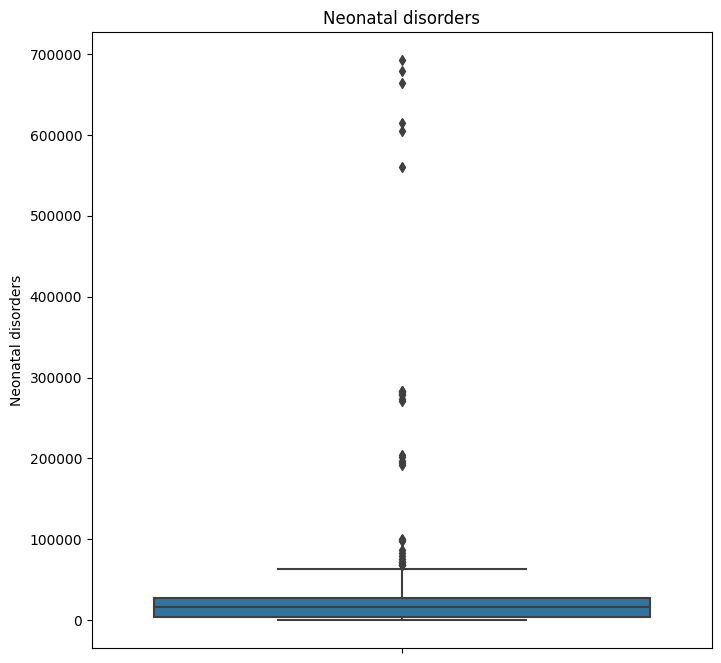

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Neonatal disorders',data=Death_Census_Data)
plt.title('Neonatal disorders')
plt.show()

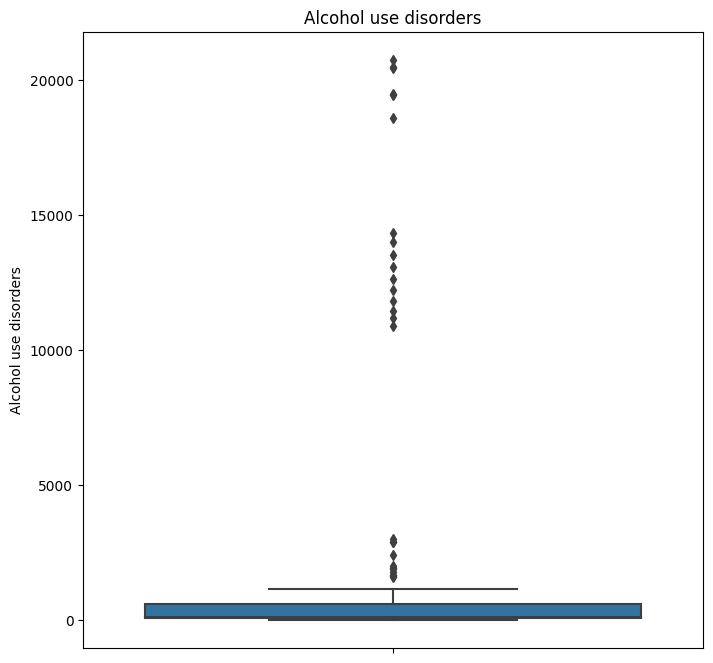

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Alcohol use disorders',data=Death_Census_Data)
plt.title('Alcohol use disorders')
plt.show()

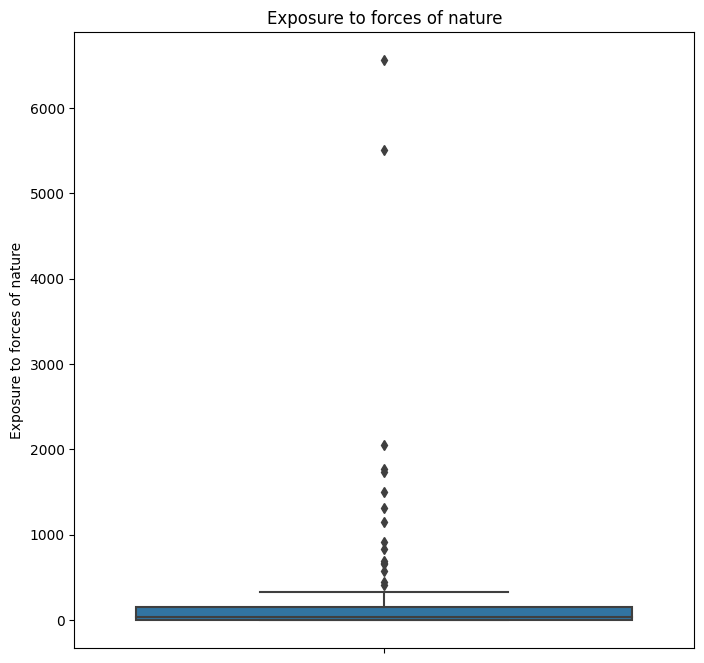

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Exposure to forces of nature',data=Death_Census_Data)
plt.title('Exposure to forces of nature')
plt.show()

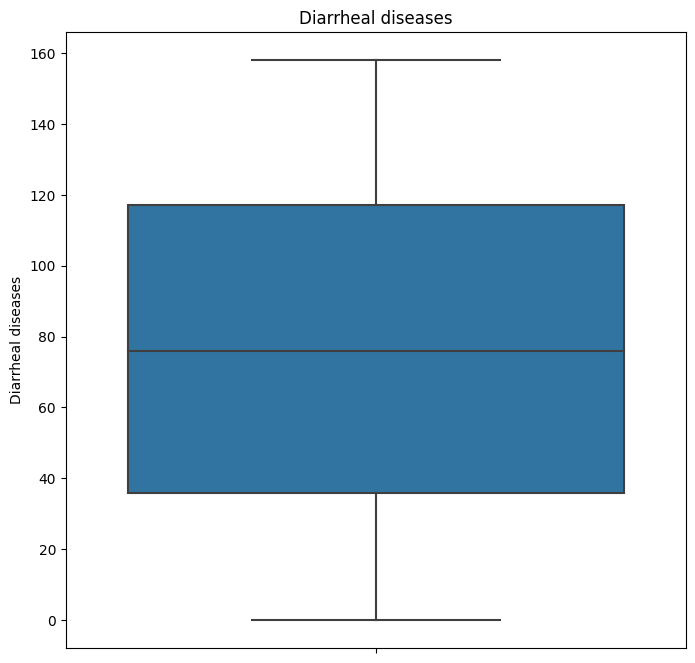

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Diarrheal diseases',data=Death_Census_Data)
plt.title('Diarrheal diseases')
plt.show()

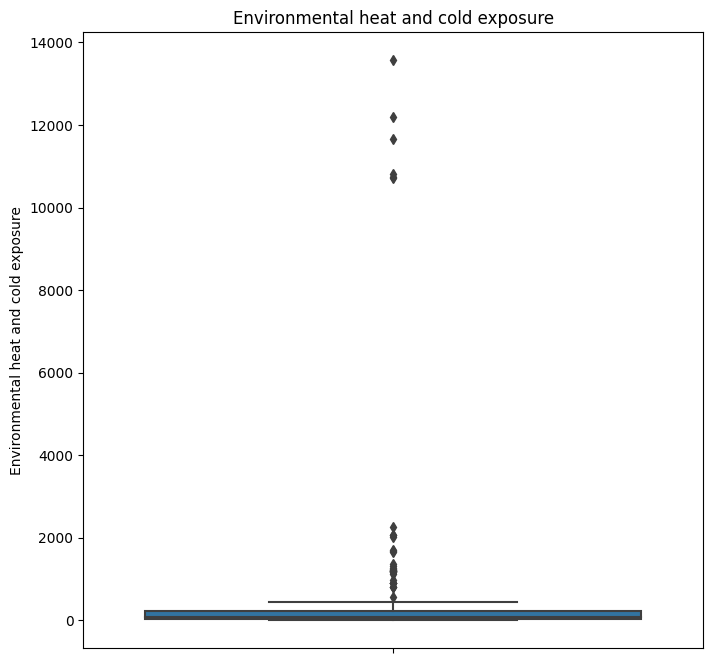

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Environmental heat and cold exposure',data=Death_Census_Data)
plt.title('Environmental heat and cold exposure')
plt.show()

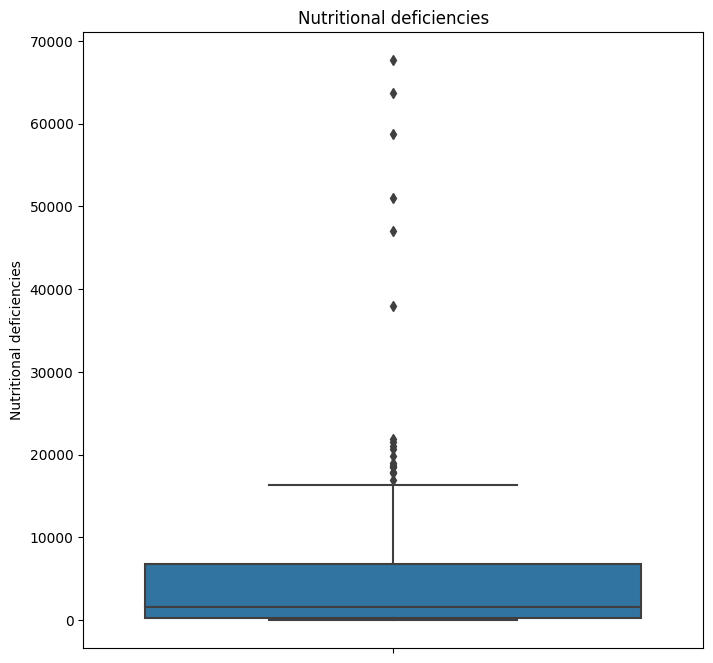

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Nutritional deficiencies',data=Death_Census_Data)
plt.title('Nutritional deficiencies')
plt.show()

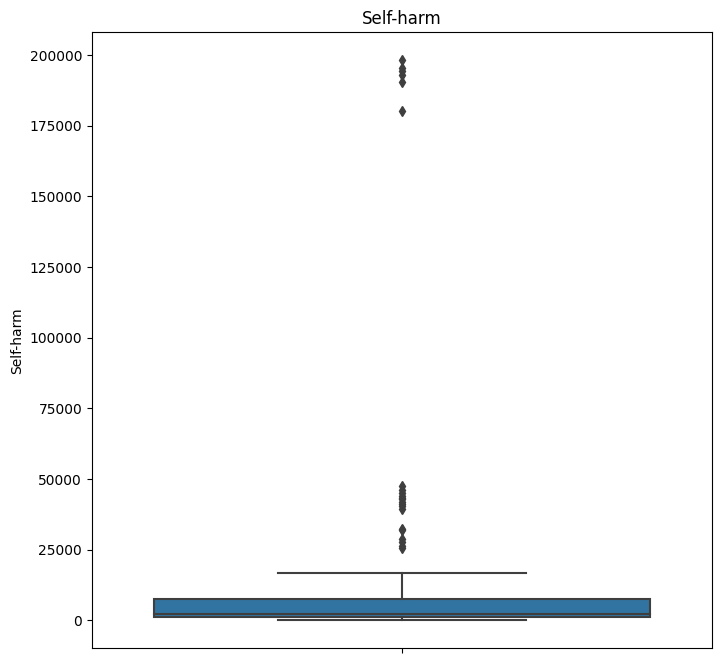

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Self-harm',data=Death_Census_Data)
plt.title('Self-harm')
plt.show()

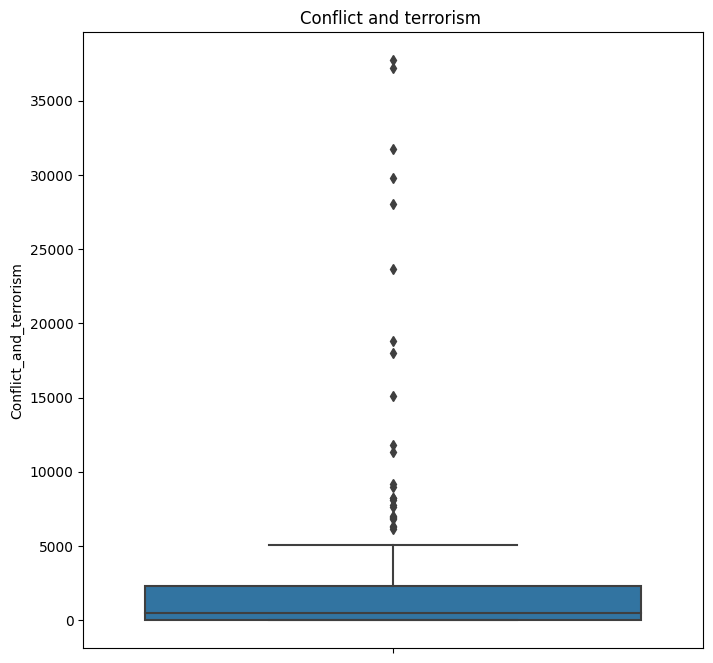

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Conflict_and_terrorism',data=Death_Census_Data)
plt.title('Conflict and terrorism ')
plt.show()

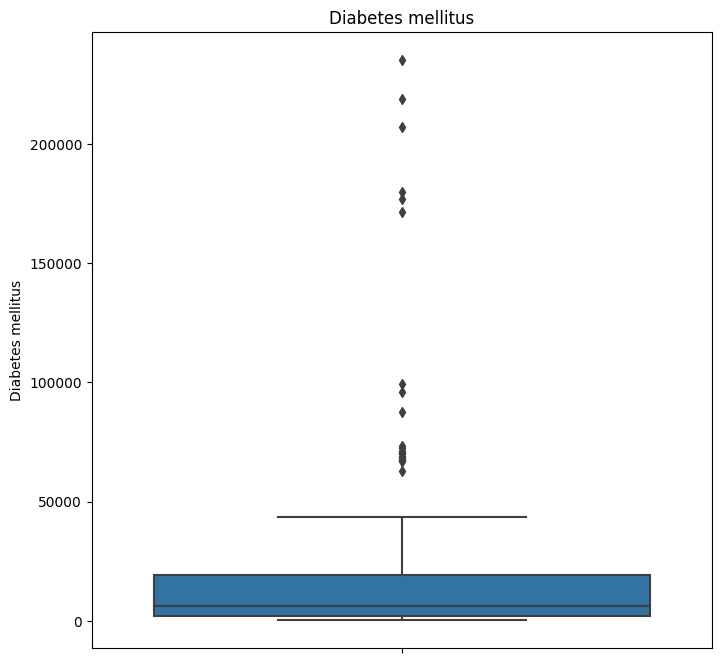

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Diabetes mellitus',data=Death_Census_Data)
plt.title('Diabetes mellitus')
plt.show()

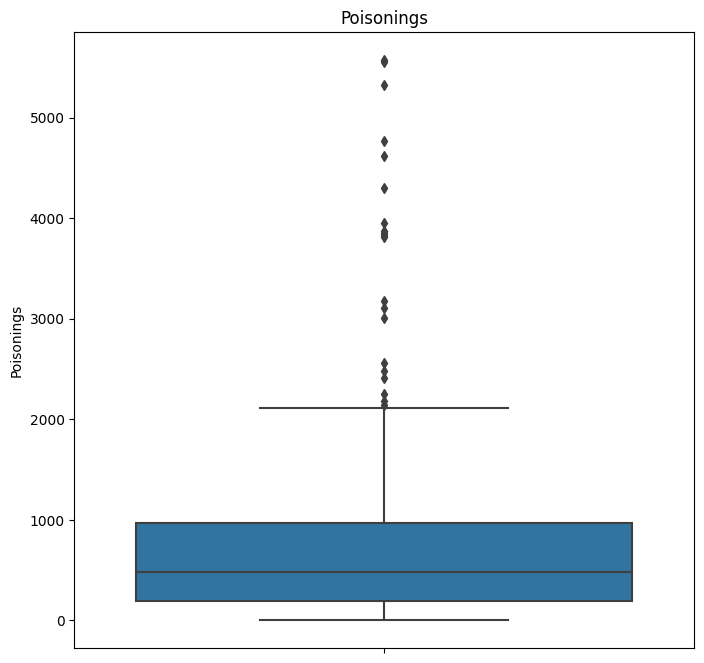

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Poisonings',data=Death_Census_Data)
plt.title('Poisonings')
plt.show()

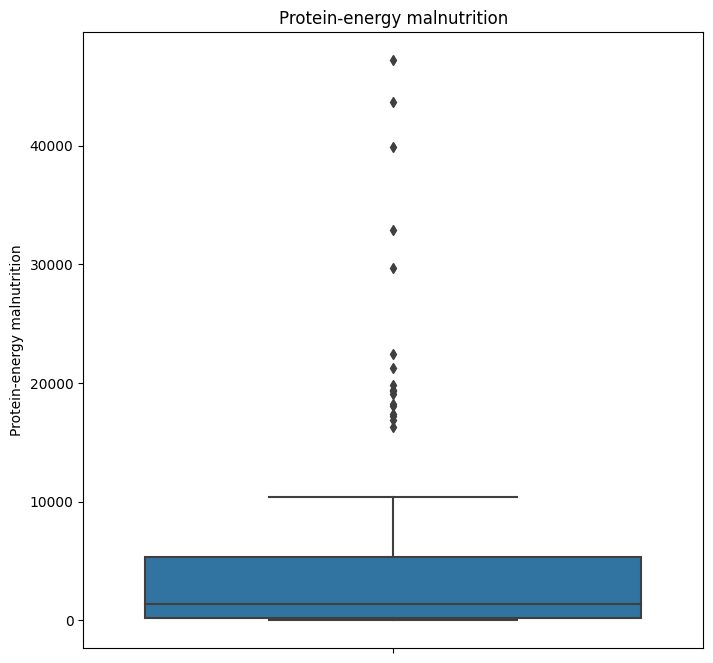

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Protein-energy malnutrition',data=Death_Census_Data)
plt.title('Protein-energy malnutrition')
plt.show()

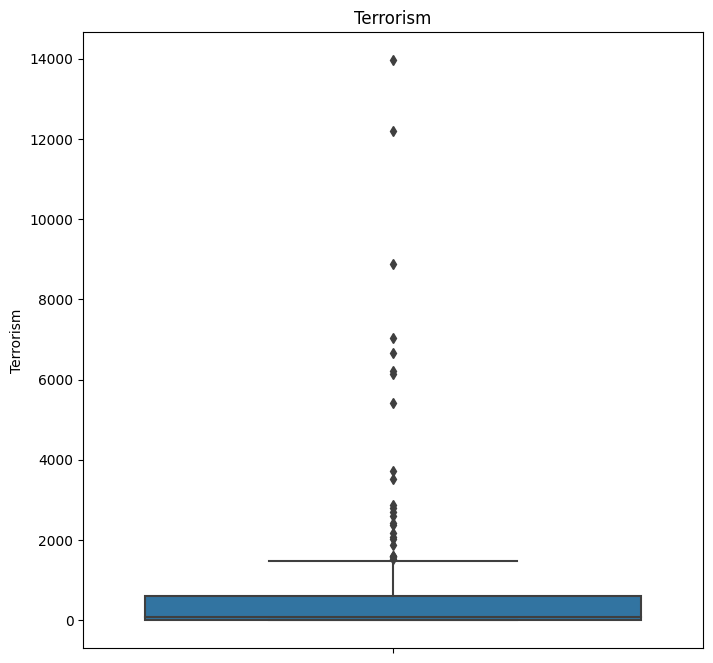

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Terrorism',data=Death_Census_Data)
plt.title('Terrorism')
plt.show()

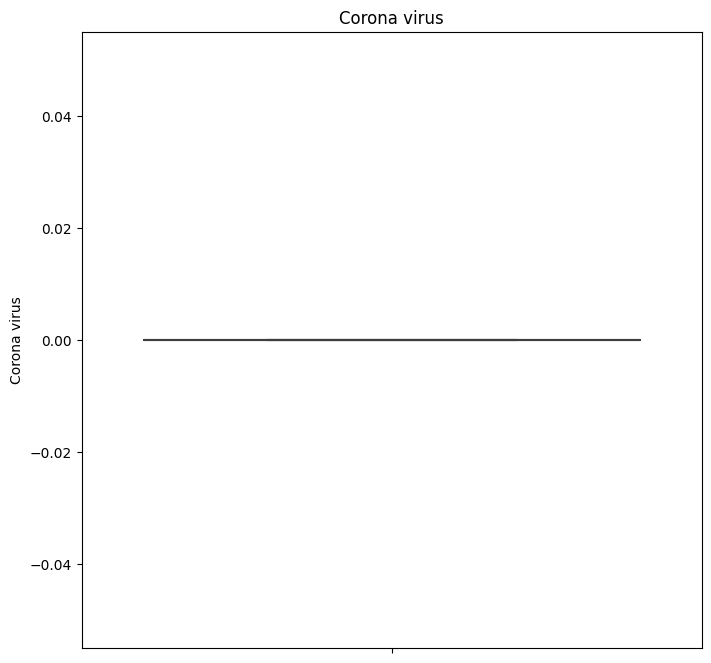

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Corona virus',data=Death_Census_Data)
plt.title('Corona virus')
plt.show()

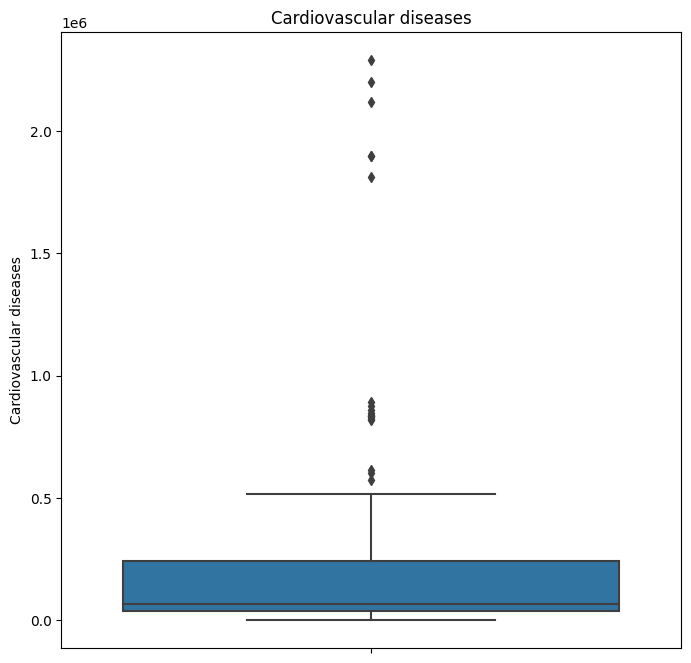

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Cardiovascular diseases',data=Death_Census_Data)
plt.title('Cardiovascular diseases')
plt.show()

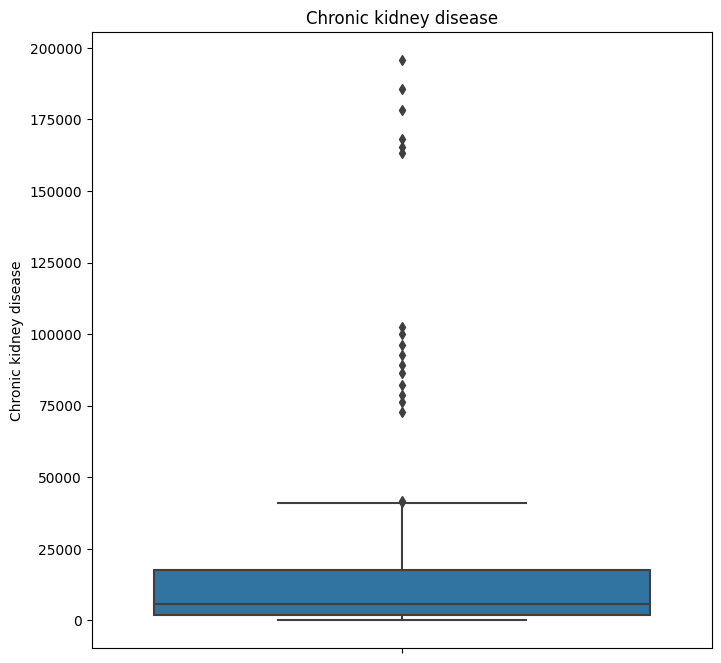

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Chronic kidney disease',data=Death_Census_Data)
plt.title('Chronic kidney disease')
plt.show()

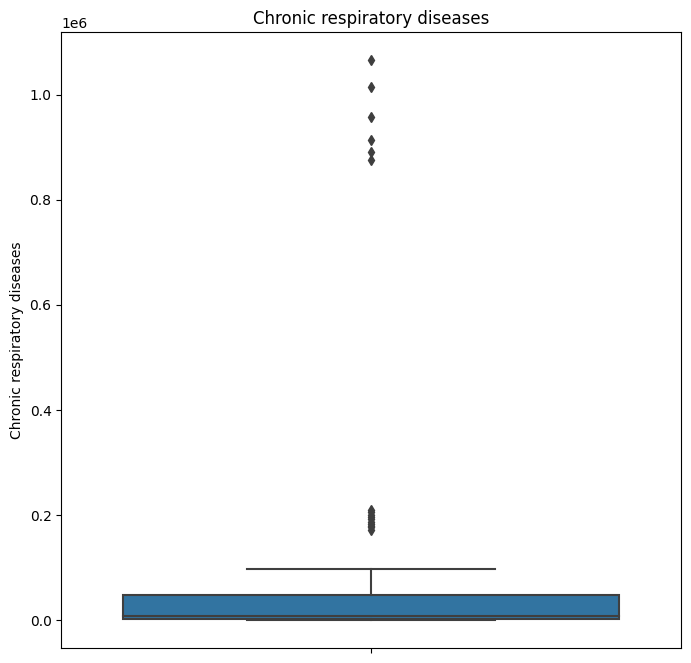

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Chronic respiratory diseases',data=Death_Census_Data)
plt.title('Chronic respiratory diseases')
plt.show()

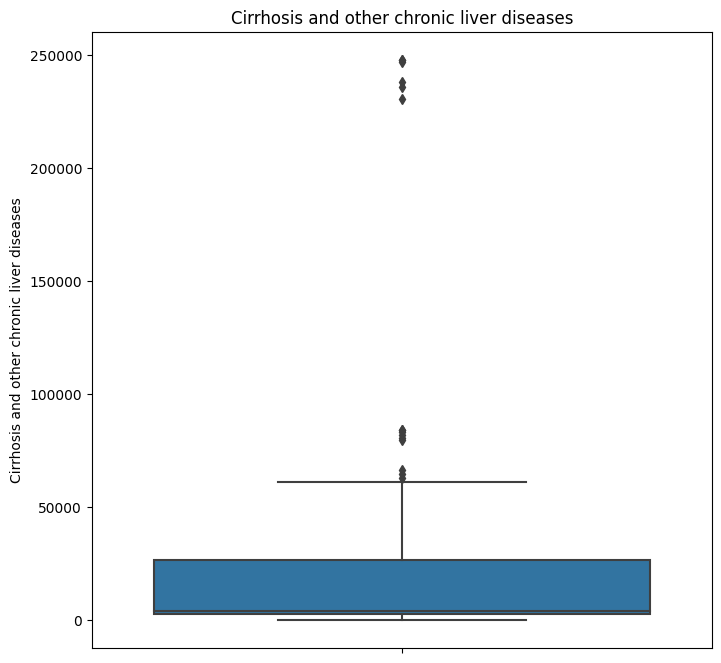

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Cirrhosis and other chronic liver diseases',data=Death_Census_Data)
plt.title('Cirrhosis and other chronic liver diseases')
plt.show()

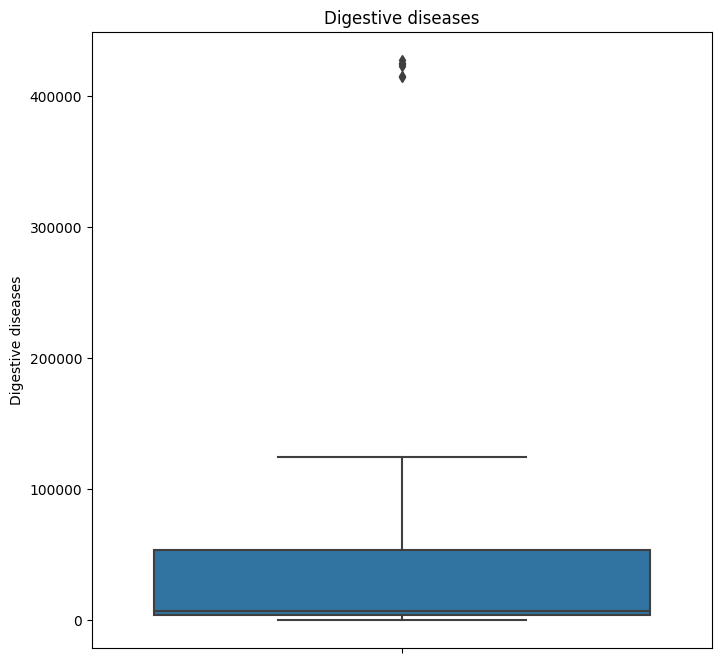

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Digestive diseases',data=Death_Census_Data)
plt.title('Digestive diseases')
plt.show()

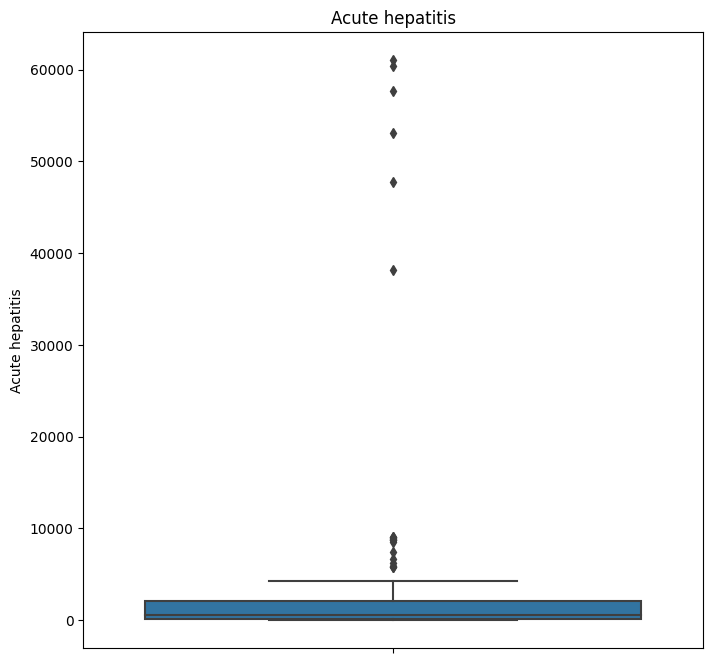

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Acute hepatitis',data=Death_Census_Data)
plt.title('Acute hepatitis')
plt.show()

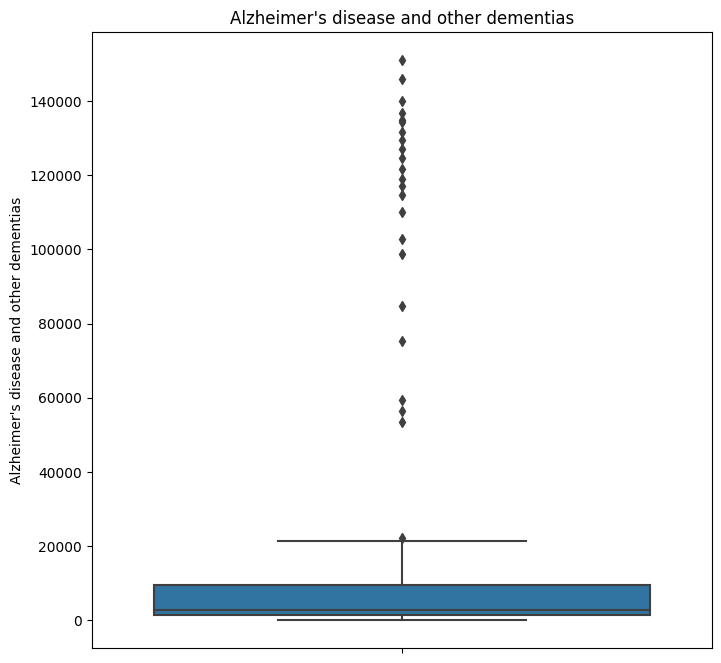

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y="Alzheimer's disease and other dementias",data=Death_Census_Data)
plt.title("Alzheimer's disease and other dementias")
plt.show()

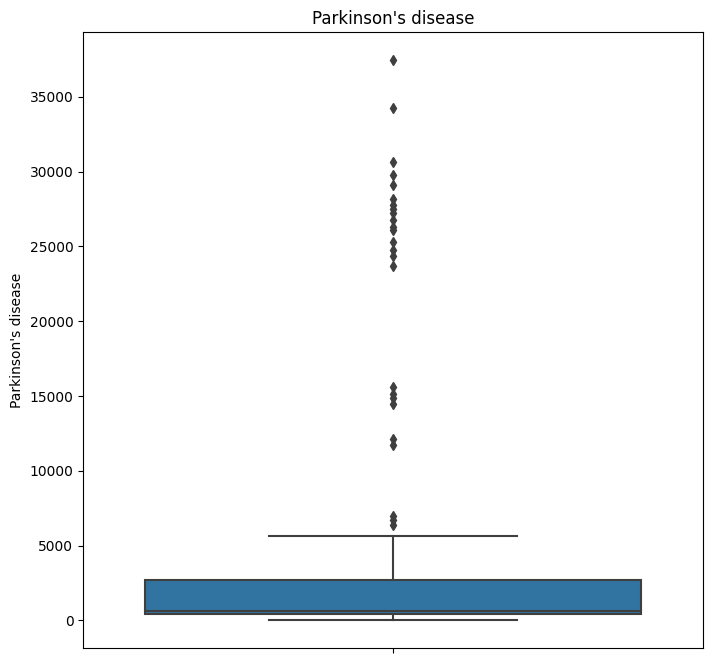

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y="Parkinson's disease",data=Death_Census_Data)
plt.title("Parkinson's disease")
plt.show()

REMOVING THE OUTLIER USING THE TECHNIQUE WINSORIZER

In [ ]:
Death_Census_Data['Year']=winsorize(Death_Census_Data['Year'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Year'])

Winsorized Data: 17      2007
18      2008
19      2009
21      2011
22      2012
        ... 
7131    2011
7132    2012
7133    2013
7134    2014
7135    2014
Name: Year, Length: 165, dtype: int64


In [ ]:
Death_Census_Data['Number of executions (Amnesty International)']=winsorize(Death_Census_Data['Number of executions (Amnesty International)'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Number of executions (Amnesty International)'])

Winsorized Data: 17      15.0
18      17.0
19       0.0
21       2.0
22      14.0
        ... 
7131    41.0
7132    28.0
7133    13.0
7134    22.0
7135     8.0
Name: Number of executions (Amnesty International), Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Meningitis']=winsorize(Death_Census_Data['Meningitis'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Meningitis'])

Winsorized Data: 17      2933.0
18      2731.0
19      2460.0
21      2327.0
22      2254.0
         ...  
7131     537.0
7132     518.0
7133     508.0
7134     499.0
7135     509.0
Name: Meningitis, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Neoplasms']=winsorize(Death_Census_Data['Neoplasms'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Neoplasms'])

Winsorized Data: 17      15925.0
18      16148.0
19      16383.0
21      17094.0
22      17522.0
         ...   
7131     9437.0
7132     9731.0
7133    10142.0
7134    10462.0
7135    10900.0
Name: Neoplasms, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Fire/heat/and/hot_substances']=winsorize(Death_Census_Data['Fire/heat/and/hot_substances'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Fire/heat/and/hot_substances'])

Winsorized Data: 17      481.0
18      462.0
19      448.0
21      448.0
22      445.0
        ...  
7131    780.0
7132    761.0
7133    777.0
7134    770.0
7135    791.0
Name: Fire/heat/and/hot_substances, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Malaria']=winsorize(Death_Census_Data['Malaria'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Malaria'])

Winsorized Data: 17       393.0
18       255.0
19       239.0
21       390.0
22        94.0
         ...  
7131    4057.0
7132    4120.0
7133    3955.0
7134    4120.0
7135    4120.0
Name: Malaria, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Drowning']=winsorize(Death_Census_Data['Drowning'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Drowning'])

Winsorized Data: 17      2127.0
18      1973.0
19      1852.0
21      1775.0
22      1716.0
         ...  
7131     858.0
7132     822.0
7133     837.0
7134     821.0
7135     837.0
Name: Drowning, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Interpersonal violence']=winsorize(Death_Census_Data['Interpersonal violence'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Interpersonal violence'])

Winsorized Data: 17      3657.0
18      3785.0
19      3874.0
21      4170.0
22      4245.0
         ...  
7131     649.0
7132     661.0
7133     672.0
7134    1136.0
7135    1087.0
Name: Interpersonal violence, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['HIV/AIDS']=winsorize(Death_Census_Data['HIV/AIDS'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['HIV/AIDS'])

Winsorized Data: 17      148.0
18      157.0
19      167.0
21      184.0
22      191.0
        ...  
7131    262.0
7132    268.0
7133    280.0
7134    285.0
7135    287.0
Name: HIV/AIDS, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Drug use disorders']=winsorize(Death_Census_Data['Drug use disorders'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Drug use disorders'])

Winsorized Data: 17      252.0
18      261.0
19      270.0
21      292.0
22      305.0
        ...  
7131    161.0
7132    168.0
7133    180.0
7134    188.0
7135    201.0
Name: Drug use disorders, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Tuberculosis']=winsorize(Death_Census_Data['Tuberculosis'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Tuberculosis'])

Winsorized Data: 17      4995.0
18      4790.0
19      4579.0
21      4259.0
22      4122.0
         ...  
7131     867.0
7132     844.0
7133     851.0
7134     850.0
7135     877.0
Name: Tuberculosis, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Road injuries']=winsorize(Death_Census_Data['Road injuries'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Road injuries'])

Winsorized Data: 17       7425.0
18       7355.0
19       7290.0
21       7432.0
22       7494.0
         ...   
7131     9969.0
7132     9890.0
7133    10167.0
7134    10178.0
7135    10522.0
Name: Road injuries, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Maternal disorders']=winsorize(Death_Census_Data['Maternal disorders'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Maternal disorders'])

Winsorized Data: 17      4990.0
18      5020.0
19      5013.0
21      4857.0
22      4736.0
         ...  
7131    1813.0
7132    1748.0
7133    1739.0
7134    1653.0
7135    1659.0
Name: Maternal disorders, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Lower respiratory infections']=winsorize(Death_Census_Data['Lower respiratory infections'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Lower respiratory infections'])

Winsorized Data: 17      27672.0
18      25800.0
19      24340.0
21      22883.0
22      22162.0
         ...   
7131     7147.0
7132     6867.0
7133     6778.0
7134     6613.0
7135     6585.0
Name: Lower respiratory infections, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Neonatal disorders']=winsorize(Death_Census_Data['Neonatal disorders'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Neonatal disorders'])

Winsorized Data: 17      23890.0
18      23792.0
19      23672.0
21      23951.0
22      24057.0
         ...   
7131    24663.0
7132    23983.0
7133    23328.0
7134    22400.0
7135    21614.0
Name: Neonatal disorders, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Alcohol use disorders']=winsorize(Death_Census_Data['Alcohol use disorders'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Alcohol use disorders'])

Winsorized Data: 17      111.0
18      114.0
19      115.0
21      120.0
22      123.0
        ...  
7131     59.0
7132     61.0
7133     63.0
7134     65.0
7135     68.0
Name: Alcohol use disorders, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Exposure to forces of nature']=winsorize(Death_Census_Data['Exposure to forces of nature'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Exposure to forces of nature'])

Winsorized Data: 17      198.0
18      198.0
19      101.0
21       83.0
22      198.0
        ...  
7131      0.0
7132      0.0
7133     40.0
7134      0.0
7135     26.0
Name: Exposure to forces of nature, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Environmental heat and cold exposure']=winsorize(Death_Census_Data['Environmental heat and cold exposure'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Environmental heat and cold exposure'])

Winsorized Data: 17       57.0
18       57.0
19       57.0
21       58.0
22      103.0
        ...  
7131     37.0
7132     36.0
7133     37.0
7134     37.0
7135     38.0
Name: Environmental heat and cold exposure, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Nutritional deficiencies']=winsorize(Death_Census_Data['Nutritional deficiencies'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Nutritional deficiencies'])

Winsorized Data: 17      2488.0
18      2277.0
19      2040.0
21      1846.0
22      1705.0
         ...  
7131    1463.0
7132    1348.0
7133    1279.0
7134    1187.0
7135    1131.0
Name: Nutritional deficiencies, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Self-harm']=winsorize(Death_Census_Data['Self-harm'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Self-harm'])

Winsorized Data: 17      1310.0
18      1330.0
19      1342.0
21      1391.0
22      1413.0
         ...  
7131    1171.0
7132    1185.0
7133    1232.0
7134    1241.0
7135    1302.0
Name: Self-harm, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Conflict_and_terrorism']=winsorize(Death_Census_Data['Conflict_and_terrorism'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Conflict_and_terrorism'])

Winsorized Data: 17      3008.0
18      3008.0
19      3008.0
21      3008.0
22      3008.0
         ...  
7131    1743.0
7132    3008.0
7133    1206.0
7134    3008.0
7135    3008.0
Name: Conflict_and_terrorism, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Diabetes mellitus']=winsorize(Death_Census_Data['Diabetes mellitus'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Diabetes mellitus'])

Winsorized Data: 17      3189.0
18      3261.0
19      3336.0
21      3550.0
22      3682.0
         ...  
7131    1256.0
7132    1310.0
7133    1375.0
7134    1435.0
7135    1507.0
Name: Diabetes mellitus, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Poisonings']=winsorize(Death_Census_Data['Poisonings'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Poisonings'])

Winsorized Data: 17      513.0
18      495.0
19      483.0
21      483.0
22      482.0
        ...  
7131    417.0
7132    408.0
7133    415.0
7134    412.0
7135    421.0
Name: Poisonings, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Protein-energy malnutrition']=winsorize(Death_Census_Data['Protein-energy malnutrition'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Protein-energy malnutrition'])

Winsorized Data: 17      2439.0
18      2231.0
19      1998.0
21      1805.0
22      1667.0
         ...  
7131    1393.0
7132    1280.0
7133    1212.0
7134    1122.0
7135    1067.0
Name: Protein-energy malnutrition, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Terrorism']=winsorize(Death_Census_Data['Terrorism'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Terrorism'])

Winsorized Data: 17      1056.0
18      1056.0
19      1056.0
21      1056.0
22      1056.0
         ...  
7131     461.0
7132    1056.0
7133     624.0
7134    1056.0
7135    1056.0
Name: Terrorism, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Corona virus']=winsorize(Death_Census_Data['Corona virus'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Corona virus'])

Winsorized Data: 17      0
18      0
19      0
21      0
22      0
       ..
7131    0
7132    0
7133    0
7134    0
7135    0
Name: Corona virus, Length: 165, dtype: int64


In [ ]:
Death_Census_Data['Cardiovascular diseases']=winsorize(Death_Census_Data['Cardiovascular diseases'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Cardiovascular diseases'])

Winsorized Data: 17      53962.0
18      54051.0
19      53964.0
21      54347.0
22      54868.0
         ...   
7131    41648.0
7132    42824.0
7133    44191.0
7134    45318.0
7135    47307.0
Name: Cardiovascular diseases, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Chronic kidney disease']=winsorize(Death_Census_Data['Chronic kidney disease'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Chronic kidney disease'])

Winsorized Data: 17      4490.0
18      4534.0
19      4597.0
21      4785.0
22      4846.0
         ...  
7131    1997.0
7132    2055.0
7133    2143.0
7134    2215.0
7135    2311.0
Name: Chronic kidney disease, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Chronic respiratory diseases']=winsorize(Death_Census_Data['Chronic respiratory diseases'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Chronic respiratory diseases'])

Winsorized Data: 17      7222.0
18      7143.0
19      7045.0
21      6916.0
22      6878.0
         ...  
7131    4539.0
7132    4620.0
7133    4746.0
7134    4825.0
7135    4981.0
Name: Chronic respiratory diseases, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Cirrhosis and other chronic liver diseases']=winsorize(Death_Census_Data['Cirrhosis and other chronic liver diseases'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Cirrhosis and other chronic liver diseases'])

Winsorized Data: 17      3346.0
18      3316.0
19      3291.0
21      3318.0
22      3353.0
         ...  
7131    2423.0
7132    2417.0
7133    2428.0
7134    2419.0
7135    2460.0
Name: Cirrhosis and other chronic liver diseases, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Digestive diseases']=winsorize(Death_Census_Data['Digestive diseases'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Digestive diseases'])

Winsorized Data: 17      6458.0
18      6408.0
19      6358.0
21      6370.0
22      6398.0
         ...  
7131    4194.0
7132    4206.0
7133    4237.0
7134    4231.0
7135    4308.0
Name: Digestive diseases, Length: 165, dtype: float64


In [ ]:
Death_Census_Data['Acute hepatitis']=winsorize(Death_Census_Data['Acute hepatitis'],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data['Acute hepatitis'])

Winsorized Data: 17      3005.0
18      3005.0
19      2663.0
21      2365.0
22      2264.0
         ...  
7131     570.0
7132     537.0
7133     517.0
7134     491.0
7135     480.0
Name: Acute hepatitis, Length: 165, dtype: float64


In [ ]:
Death_Census_Data["Alzheimer's disease and other dementias"]=winsorize(Death_Census_Data["Alzheimer's disease and other dementias"],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data["Alzheimer's disease and other dementias"])

Winsorized Data: 17      1402.0
18      1424.0
19      1449.0
21      1508.0
22      1544.0
         ...  
7131    1282.0
7132    1337.0
7133    1396.0
7134    1453.0
7135    1510.0
Name: Alzheimer's disease and other dementias, Length: 165, dtype: float64


In [ ]:
Death_Census_Data["Parkinson's disease"]=winsorize(Death_Census_Data["Parkinson's disease"],limits=[0.05,0.20])
print('Winsorized Data:',Death_Census_Data["Parkinson's disease"])

Winsorized Data: 17      450.0
18      455.0
19      460.0
21      473.0
22      482.0
        ...  
7131    302.0
7132    315.0
7133    329.0
7134    343.0
7135    357.0
Name: Parkinson's disease, Length: 165, dtype: float64


CHECKING FOR OUTLIERS AFTER WINSORIZER

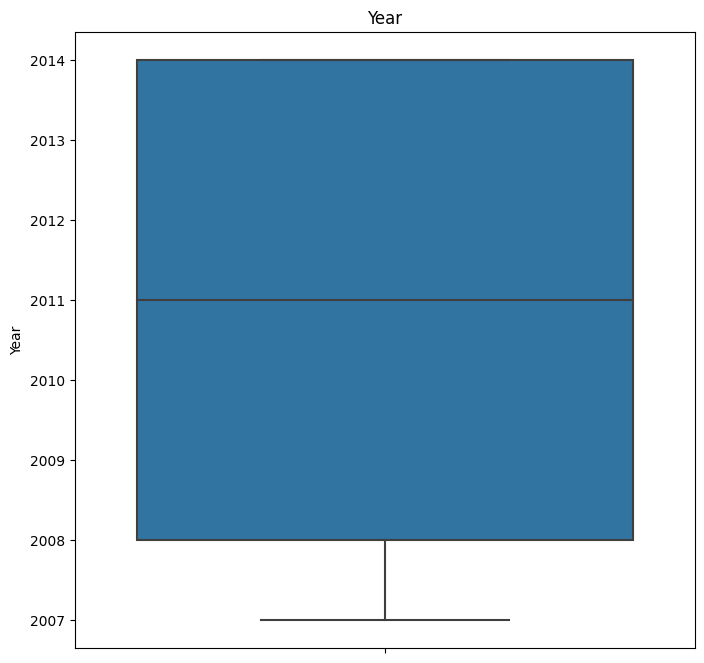

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Year',data=Death_Census_Data)
plt.title('Year')
plt.show()

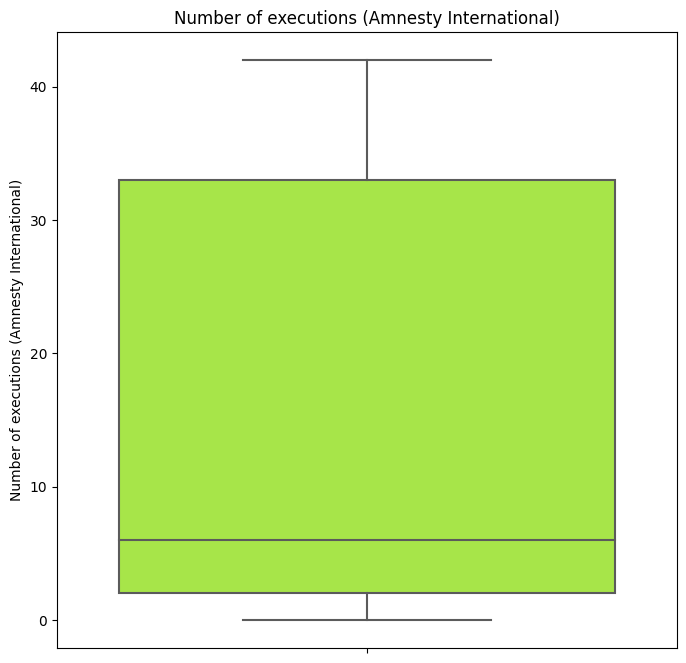

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Number of executions (Amnesty International)',data=Death_Census_Data,color='greenyellow')
plt.title('Number of executions (Amnesty International)')
plt.show()

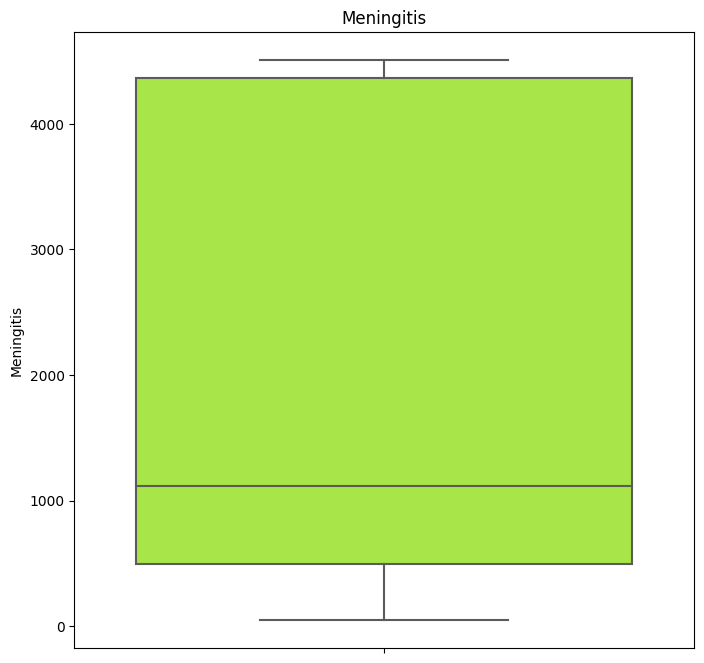

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Meningitis',data=Death_Census_Data,color='greenyellow')
plt.title('Meningitis')
plt.show()

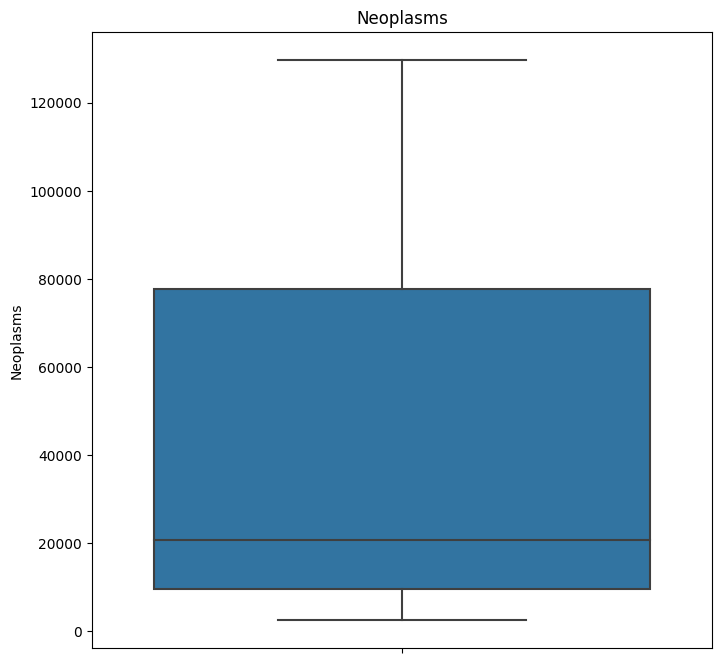

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Neoplasms',data=Death_Census_Data)
plt.title('Neoplasms')
plt.show()

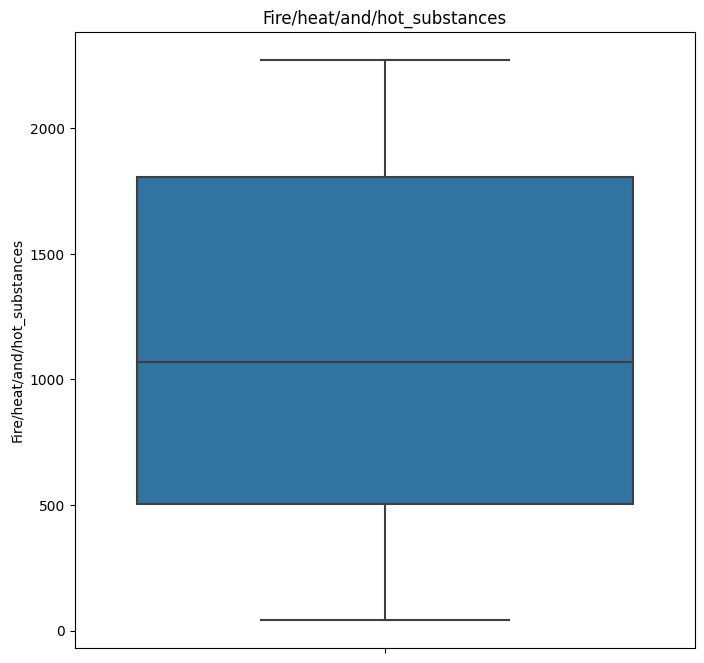

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Fire/heat/and/hot_substances',data=Death_Census_Data)
plt.title('Fire/heat/and/hot_substances')
plt.show()

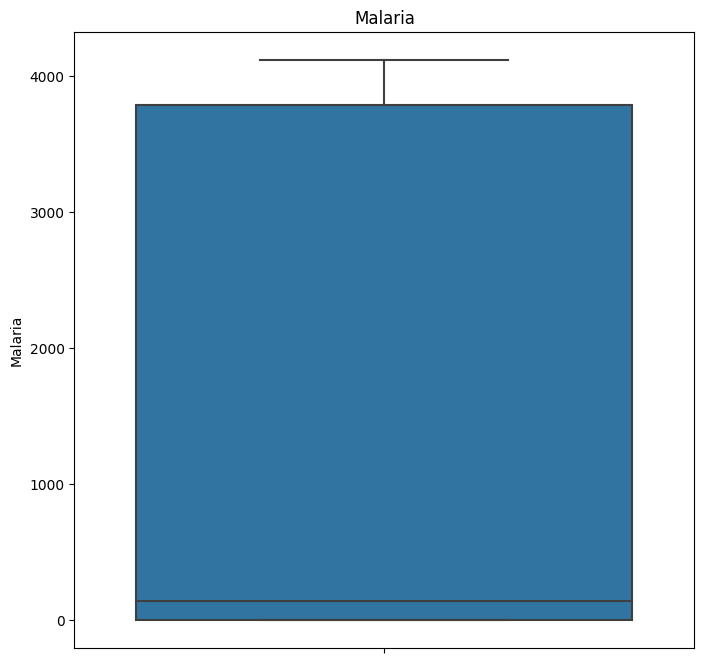

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Malaria',data=Death_Census_Data)
plt.title('Malaria')
plt.show()

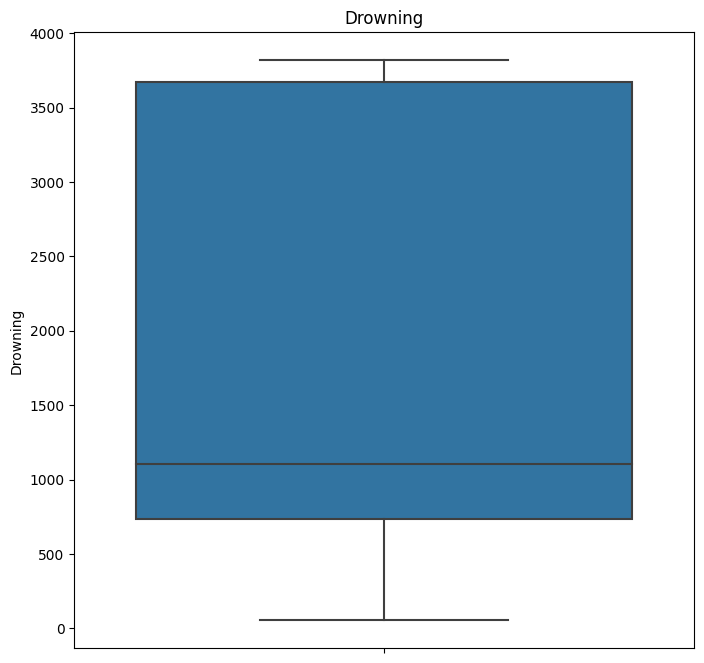

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Drowning',data=Death_Census_Data)
plt.title('Drowning')
plt.show()

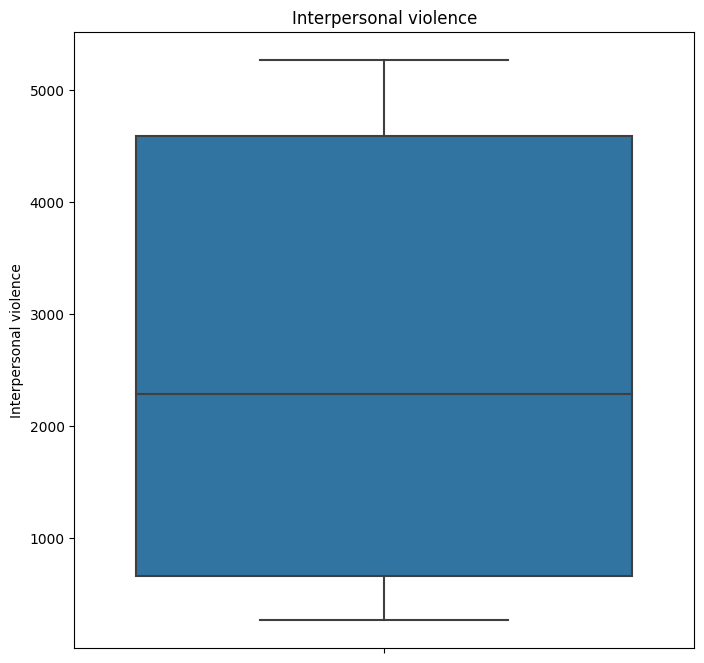

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Interpersonal violence',data=Death_Census_Data)
plt.title('Interpersonal violence')
plt.show()

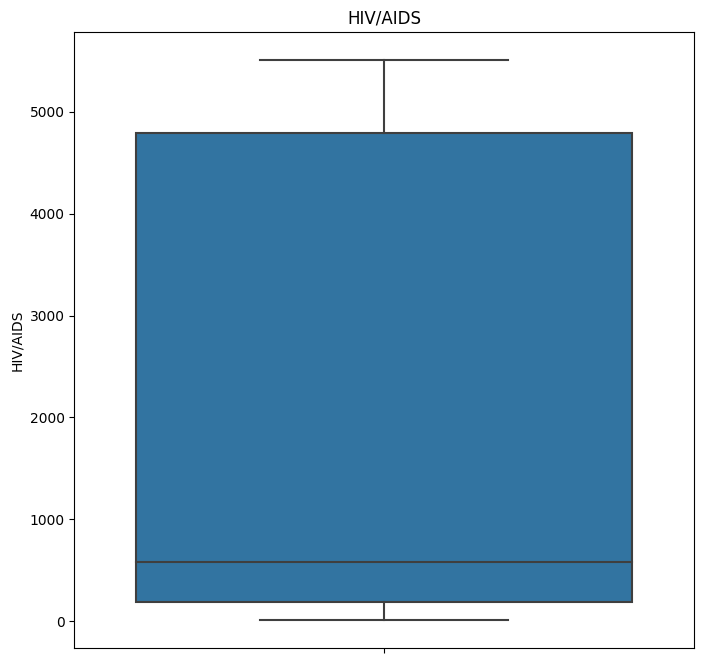

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='HIV/AIDS',data=Death_Census_Data)
plt.title('HIV/AIDS')
plt.show()

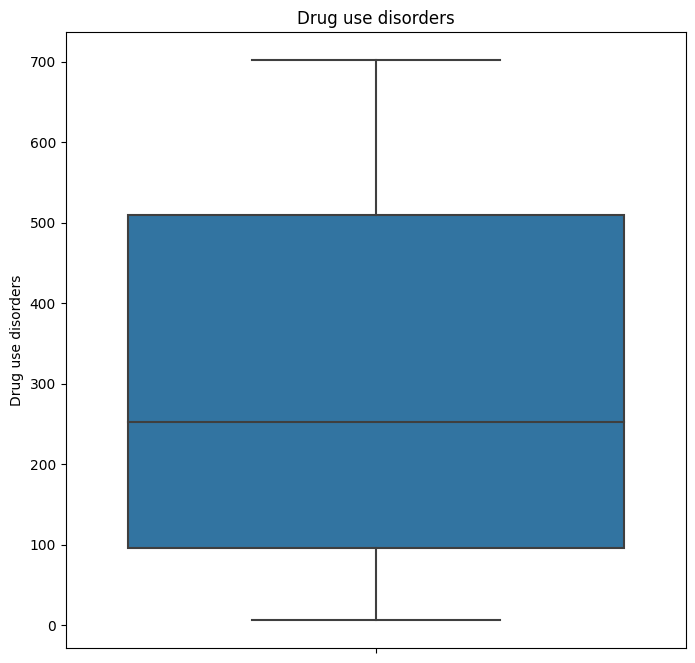

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Drug use disorders',data=Death_Census_Data)
plt.title('Drug use disorders')
plt.show()

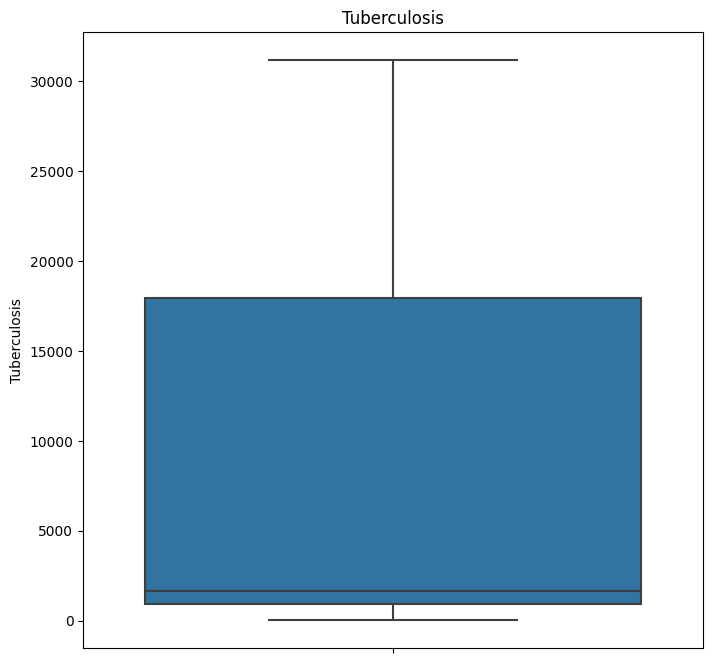

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Tuberculosis',data=Death_Census_Data)
plt.title('Tuberculosis')
plt.show()

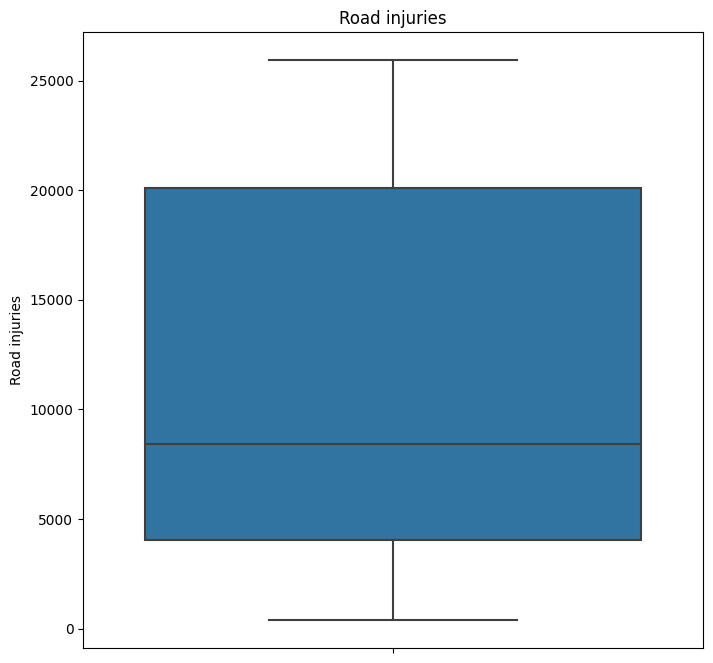

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Road injuries',data=Death_Census_Data)
plt.title('Road injuries')
plt.show()

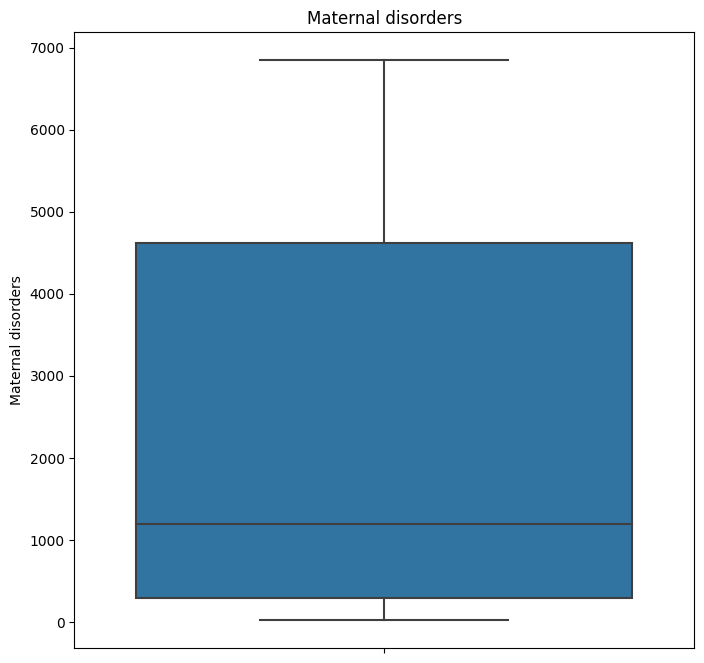

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Maternal disorders',data=Death_Census_Data)
plt.title('Maternal disorders')
plt.show()

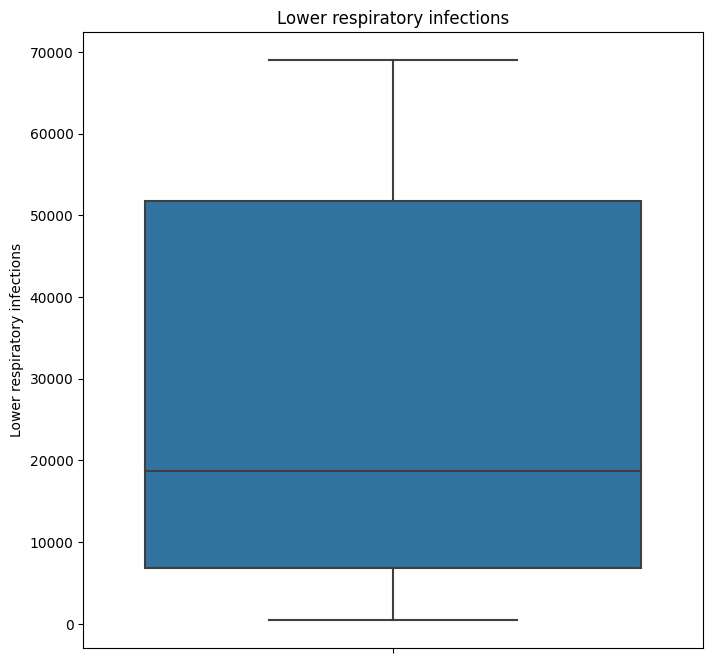

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Lower respiratory infections',data=Death_Census_Data)
plt.title('Lower respiratory infections')
plt.show()

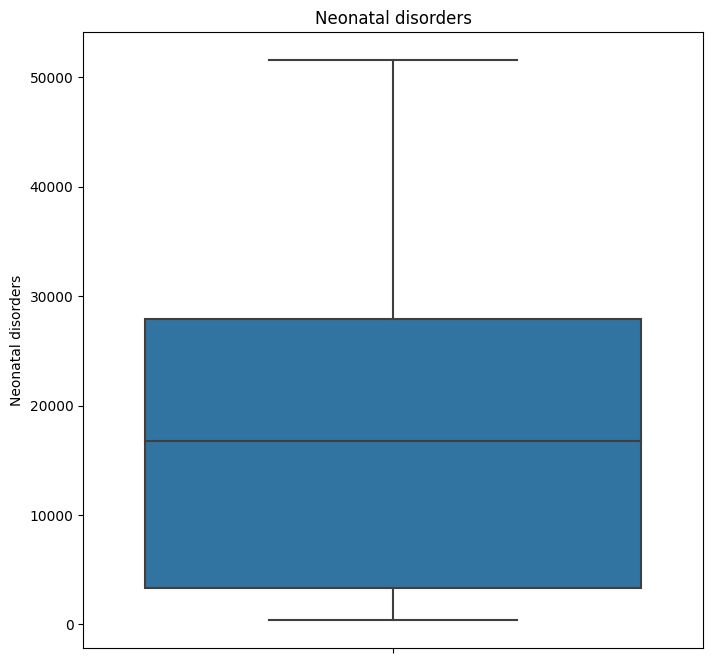

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Neonatal disorders',data=Death_Census_Data)
plt.title('Neonatal disorders')
plt.show()

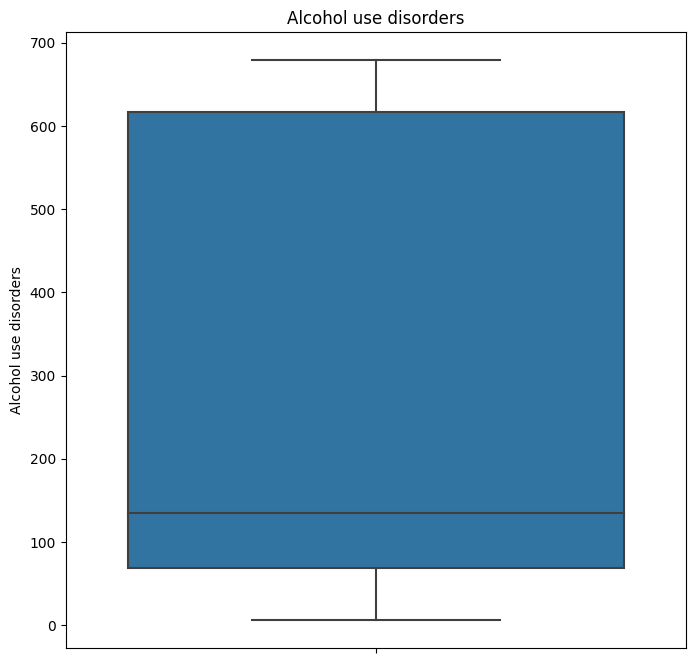

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Alcohol use disorders',data=Death_Census_Data)
plt.title('Alcohol use disorders')
plt.show()

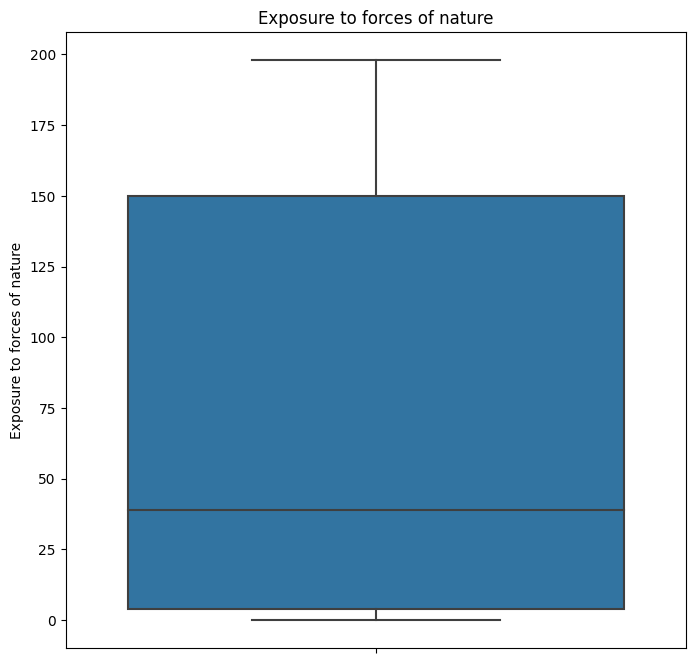

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Exposure to forces of nature',data=Death_Census_Data)
plt.title('Exposure to forces of nature')
plt.show()

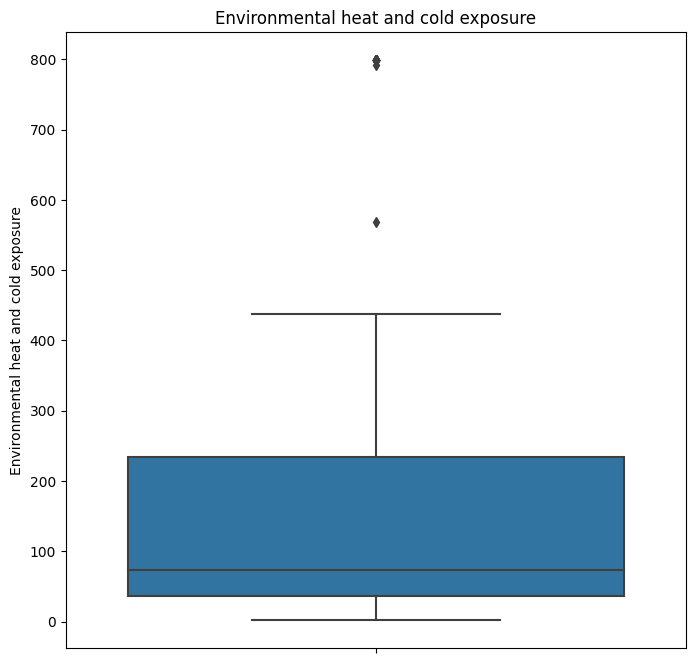

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Environmental heat and cold exposure',data=Death_Census_Data)
plt.title('Environmental heat and cold exposure')
plt.show()

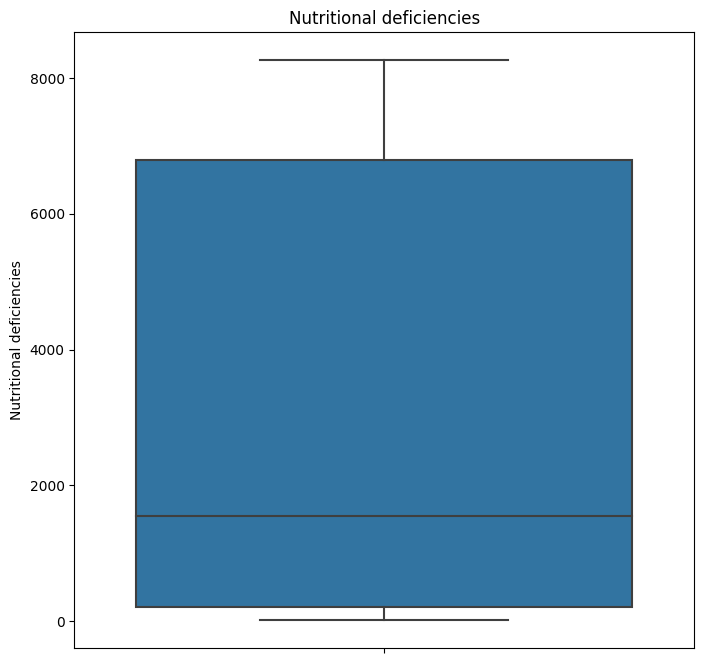

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Nutritional deficiencies',data=Death_Census_Data)
plt.title('Nutritional deficiencies')
plt.show()

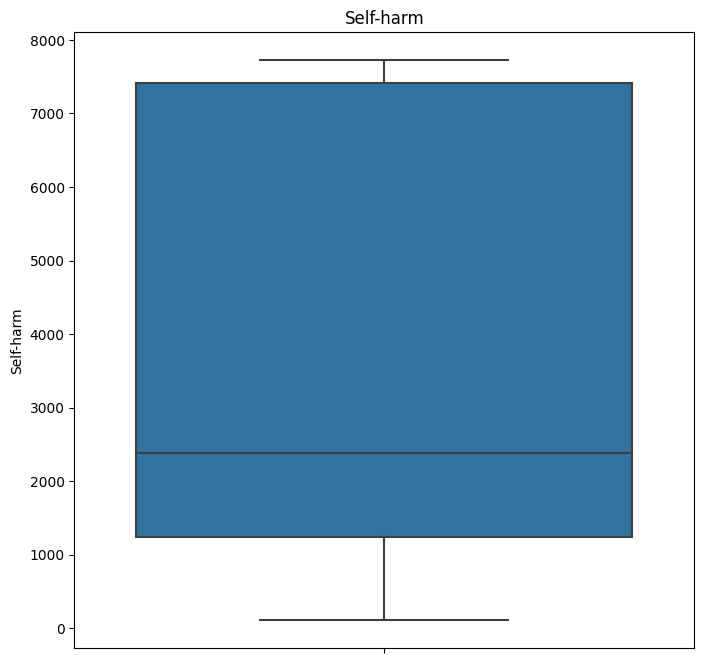

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Self-harm',data=Death_Census_Data)
plt.title('Self-harm')
plt.show()

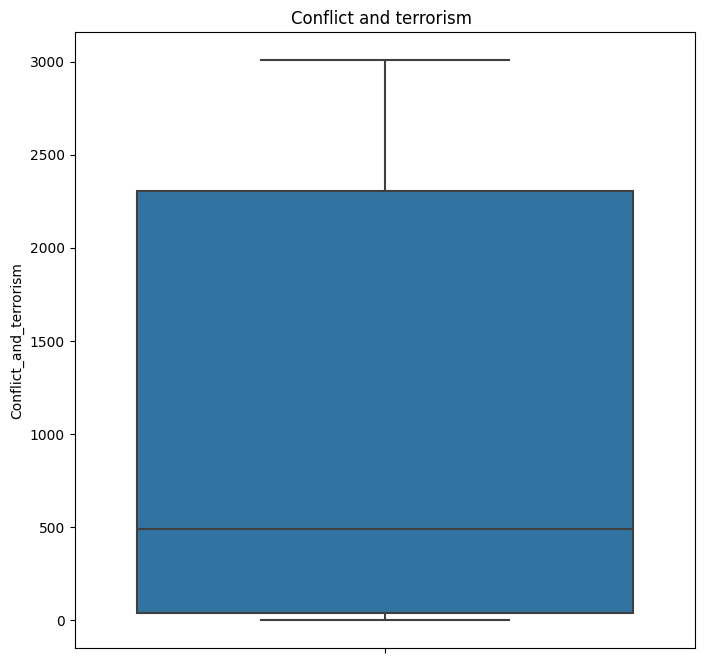

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Conflict_and_terrorism',data=Death_Census_Data)
plt.title('Conflict and terrorism ')
plt.show()

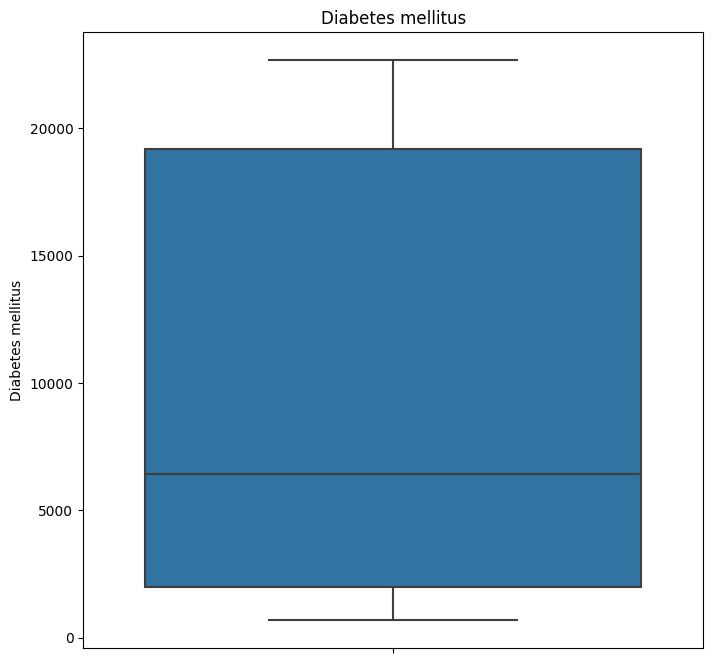

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Diabetes mellitus',data=Death_Census_Data)
plt.title('Diabetes mellitus')
plt.show()

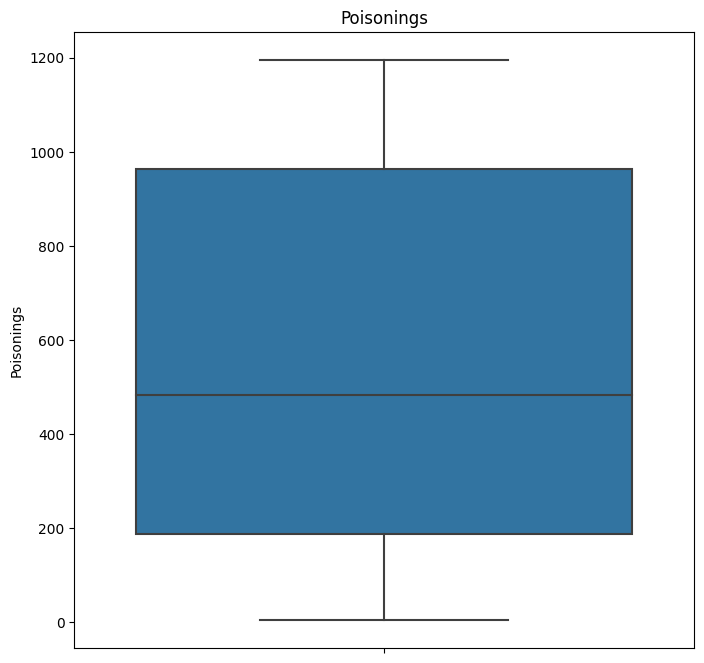

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Poisonings',data=Death_Census_Data)
plt.title('Poisonings')
plt.show()

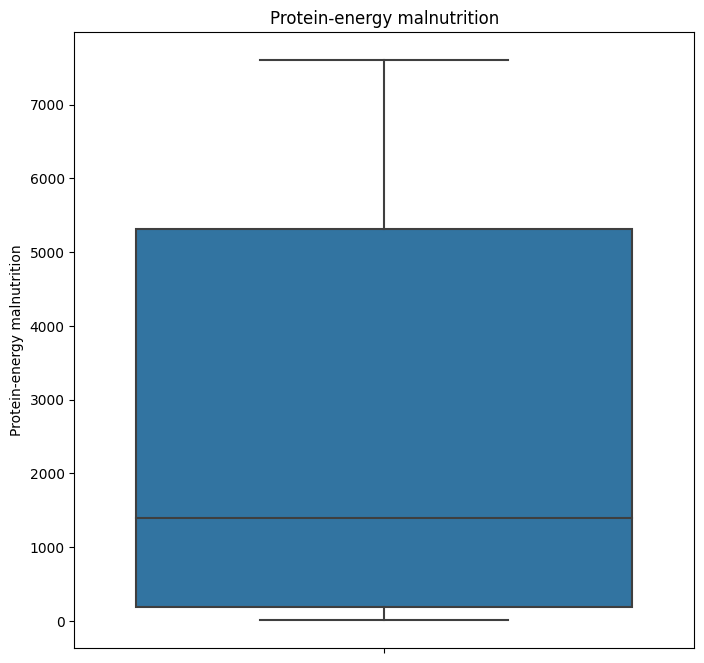

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Protein-energy malnutrition',data=Death_Census_Data)
plt.title('Protein-energy malnutrition')
plt.show()

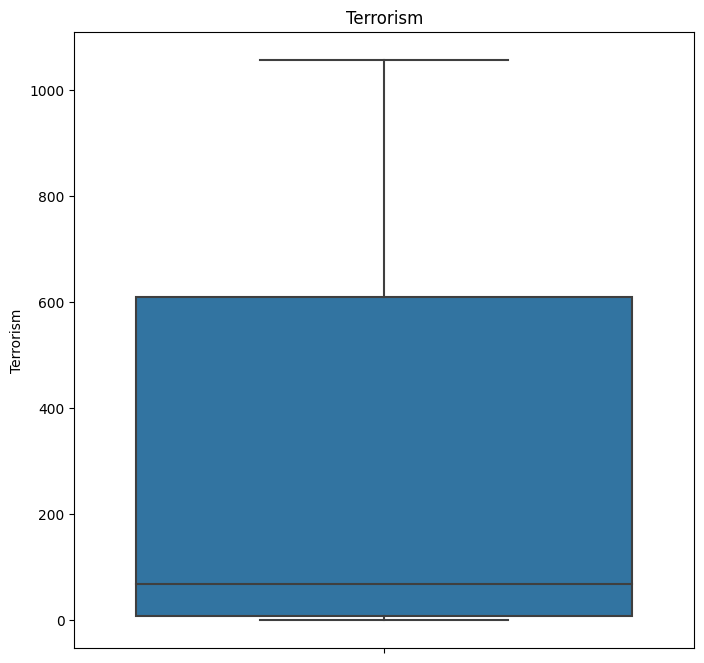

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Terrorism',data=Death_Census_Data)
plt.title('Terrorism')
plt.show()

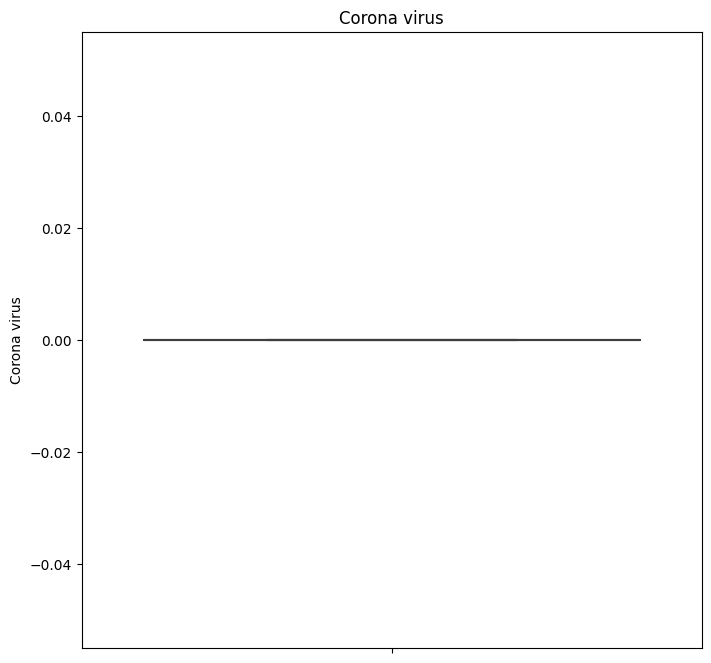

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Corona virus',data=Death_Census_Data)
plt.title('Corona virus')
plt.show()

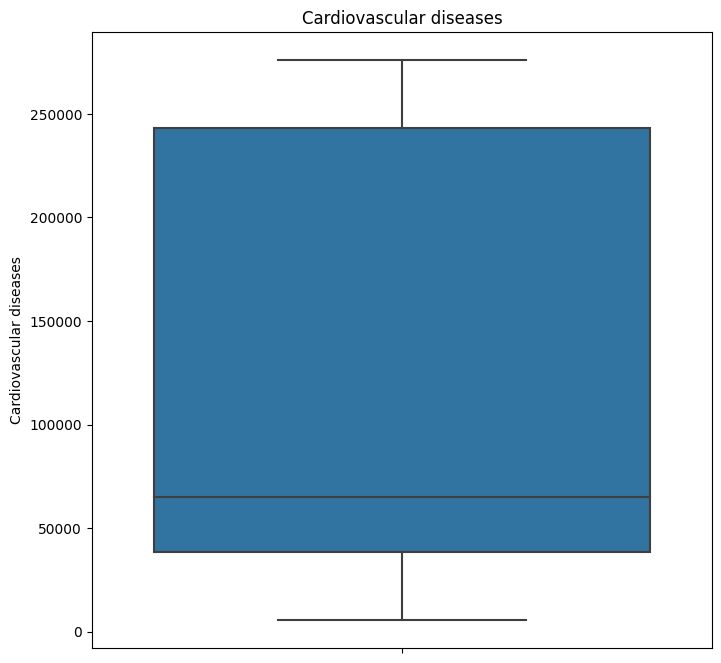

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Cardiovascular diseases',data=Death_Census_Data)
plt.title('Cardiovascular diseases')
plt.show()

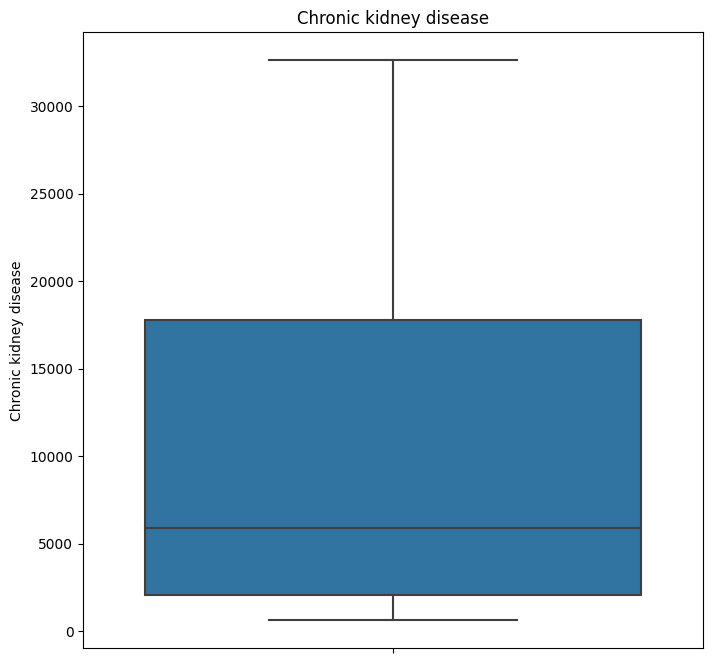

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Chronic kidney disease',data=Death_Census_Data)
plt.title('Chronic kidney disease')
plt.show()

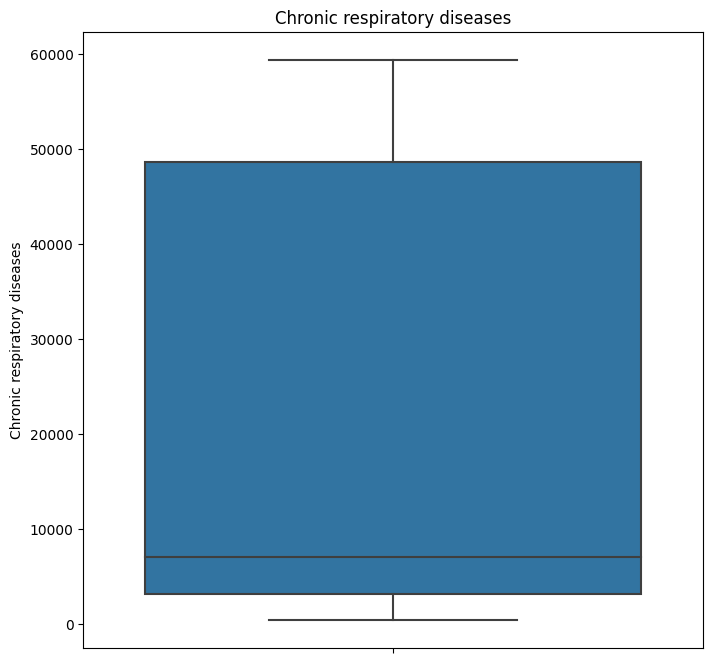

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Chronic respiratory diseases',data=Death_Census_Data)
plt.title('Chronic respiratory diseases')
plt.show()

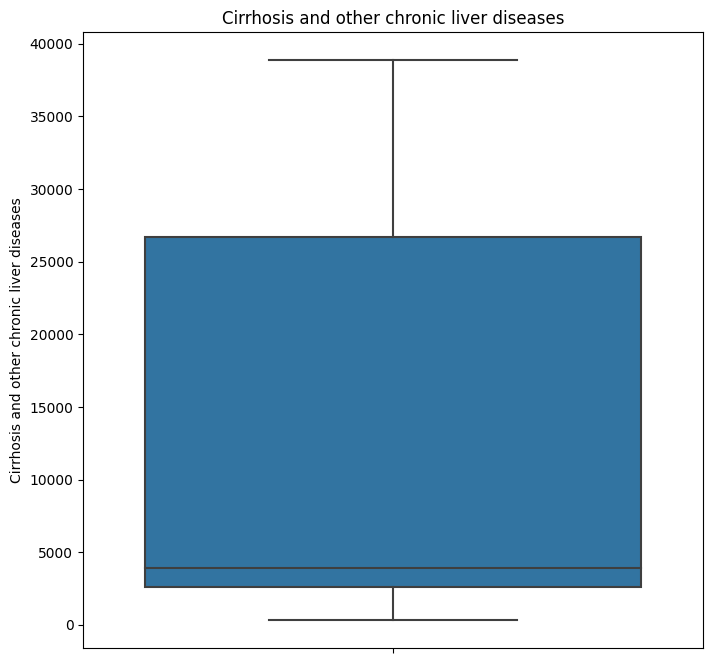

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Cirrhosis and other chronic liver diseases',data=Death_Census_Data)
plt.title('Cirrhosis and other chronic liver diseases')
plt.show()

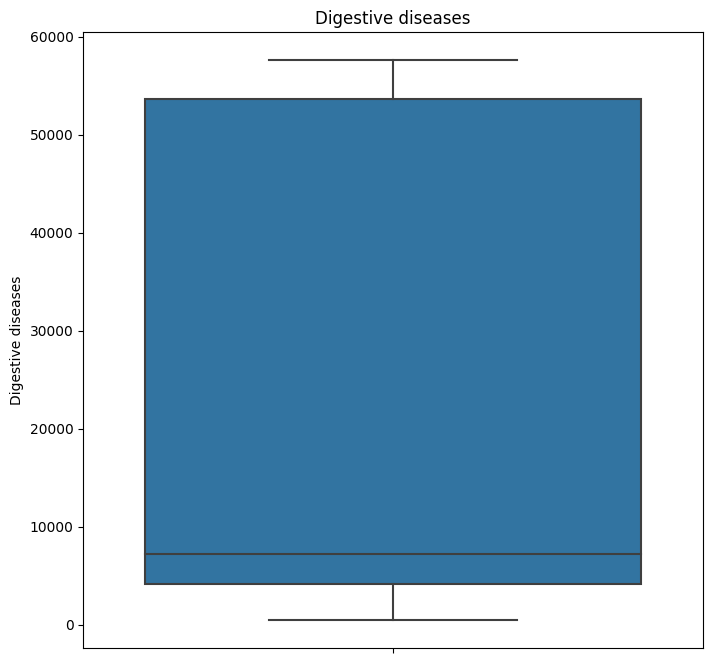

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Digestive diseases',data=Death_Census_Data)
plt.title('Digestive diseases')
plt.show()

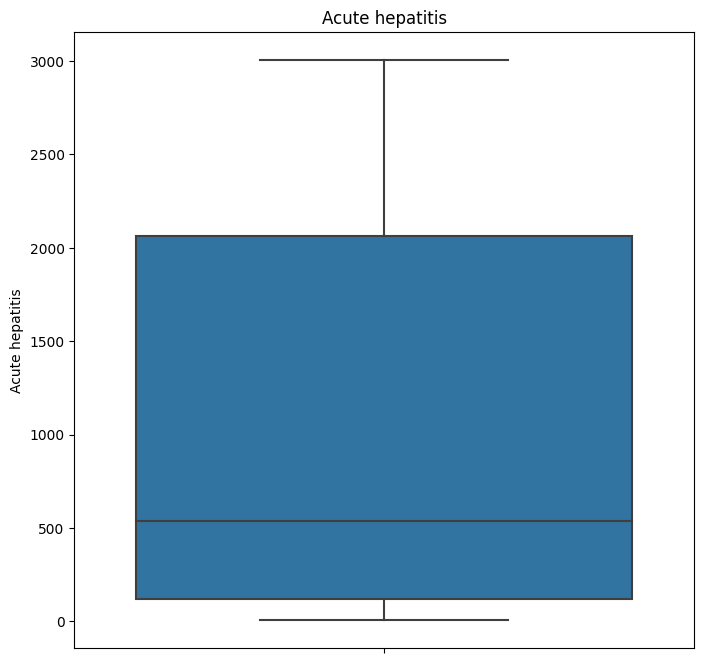

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Acute hepatitis',data=Death_Census_Data)
plt.title('Acute hepatitis')
plt.show()

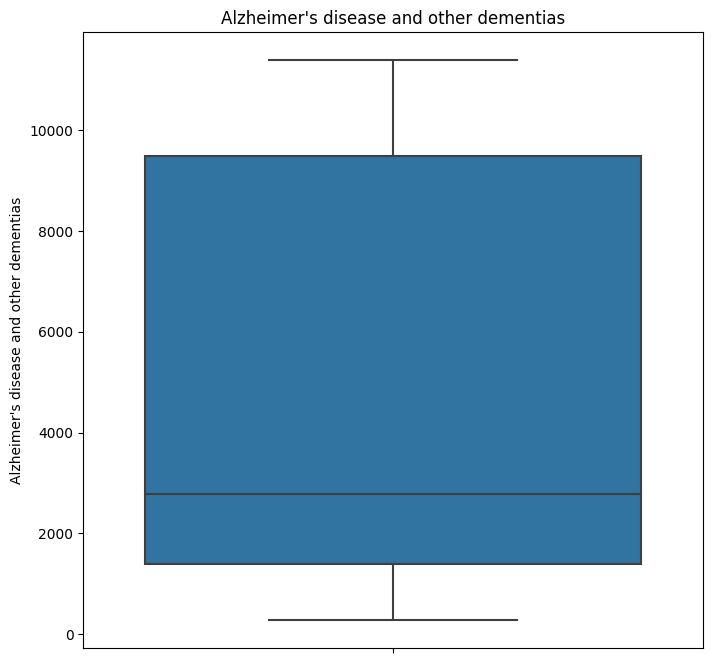

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y="Alzheimer's disease and other dementias",data=Death_Census_Data)
plt.title("Alzheimer's disease and other dementias")
plt.show()

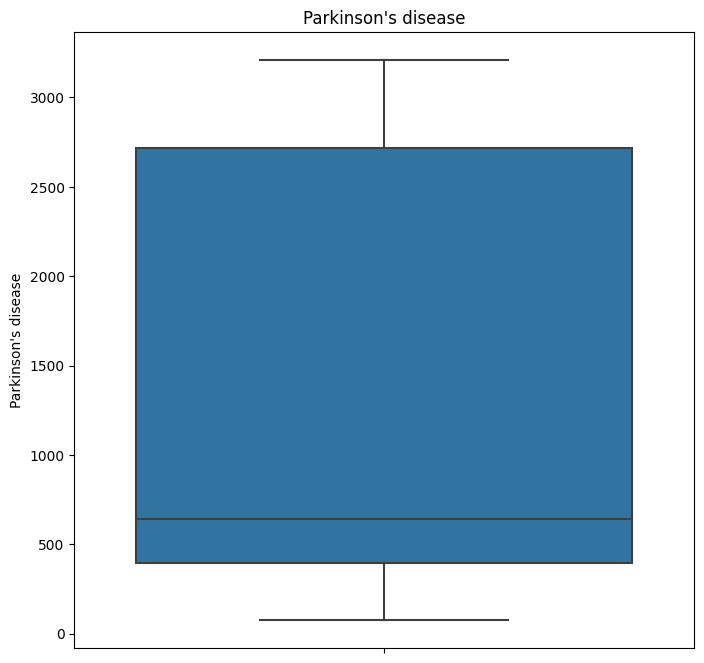

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y="Parkinson's disease",data=Death_Census_Data)
plt.title("Parkinson's disease")
plt.show()

PLOTING THE GRAPH FOR IDENTIYFING WHICH DISEASE CAUSE MAXIMUM NUMBER OF DEATH

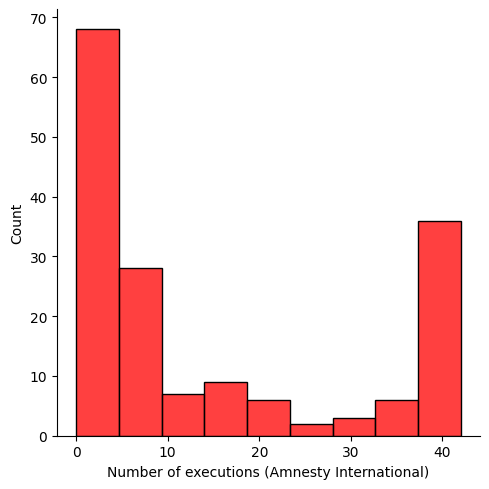

In [ ]:
sns.displot(Death_Census_Data["Number of executions (Amnesty International)"],color='red')

<ipython-input-159-16979e285d2d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Death_Census_Data["Meningitis"],color='green')


<Axes: xlabel='Meningitis', ylabel='Density'>

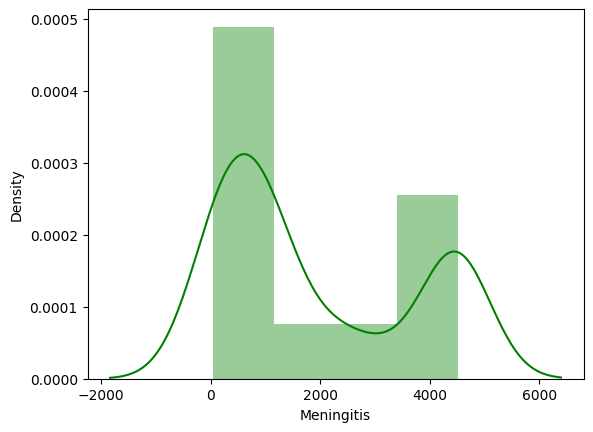

In [ ]:
sns.distplot(Death_Census_Data["Meningitis"],color='green')

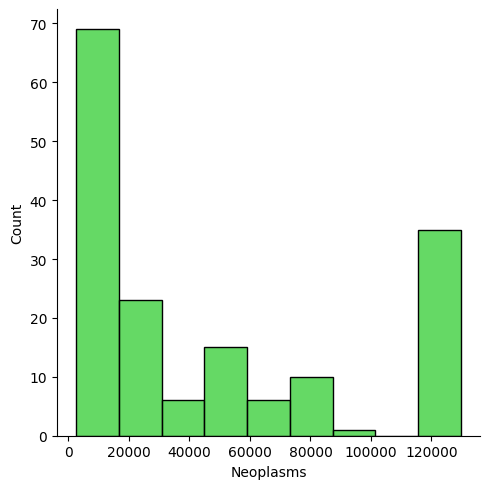

In [ ]:
sns.displot(Death_Census_Data["Neoplasms"],color='limegreen')

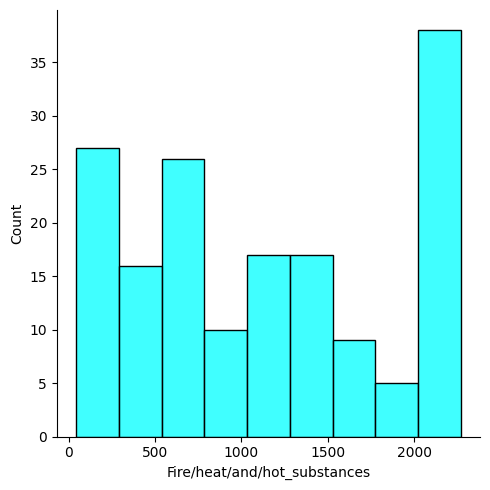

In [ ]:
sns.displot(Death_Census_Data["Fire/heat/and/hot_substances"],color='aqua')

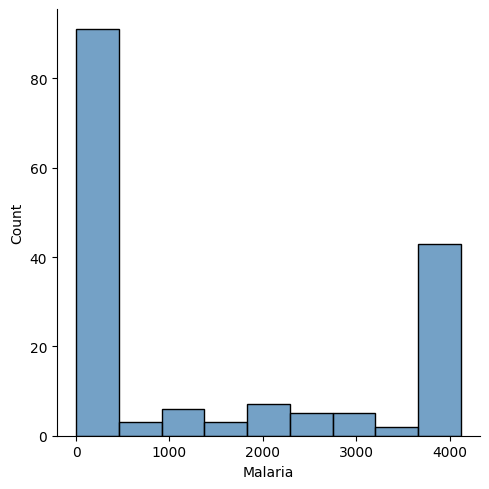

In [ ]:
sns.displot(Death_Census_Data["Malaria"],color='steelblue')

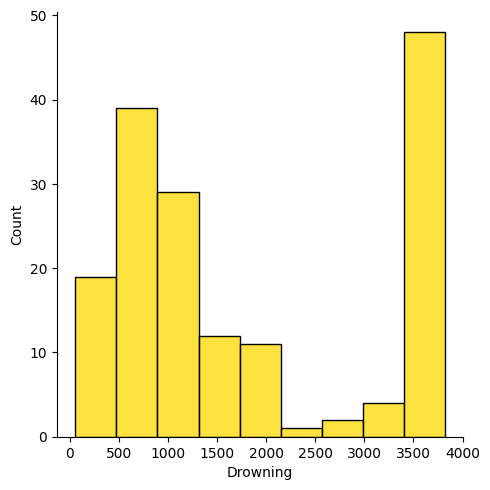

In [ ]:
sns.displot(Death_Census_Data["Drowning"],color='gold')

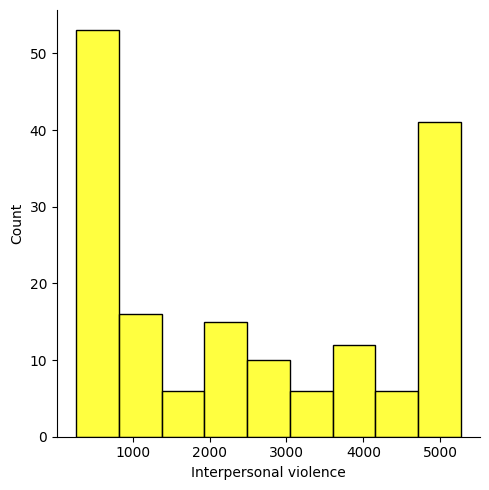

In [ ]:
sns.displot(Death_Census_Data["Interpersonal violence"],color='yellow')

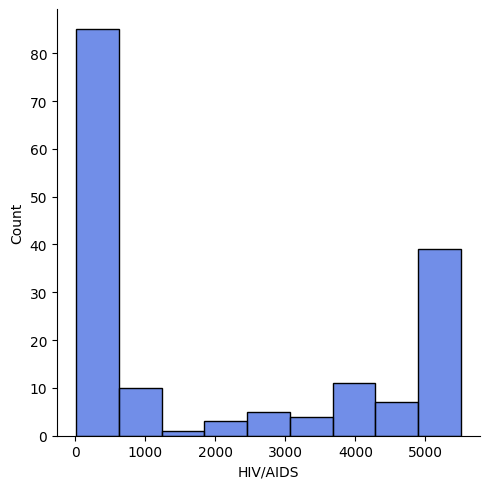

In [ ]:
sns.displot(Death_Census_Data["HIV/AIDS"],color='royalblue')

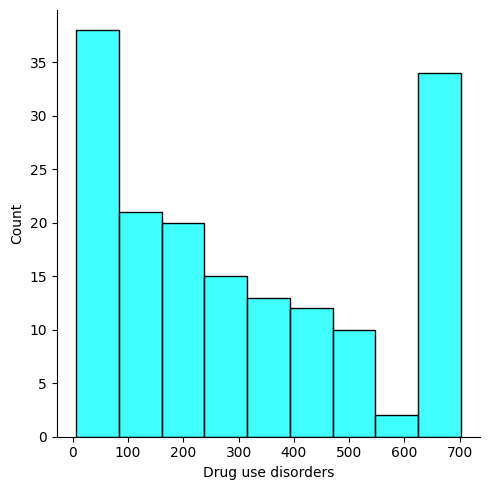

In [ ]:
sns.displot(Death_Census_Data["Drug use disorders"],color='cyan')

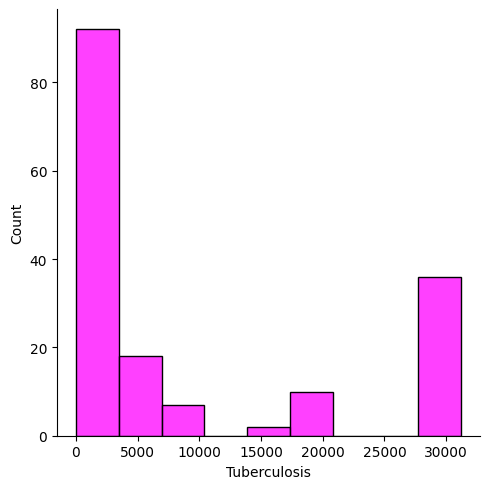

In [ ]:
sns.displot(Death_Census_Data["Tuberculosis"],color='fuchsia')

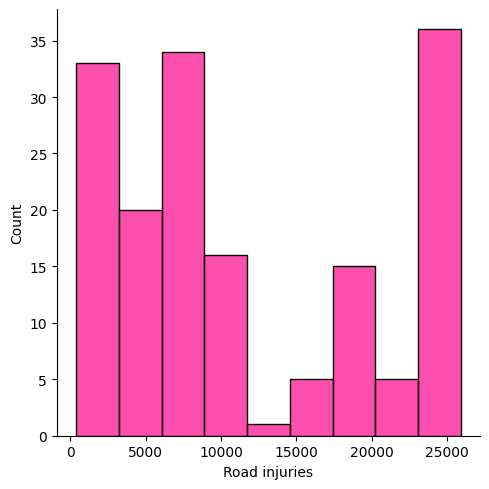

In [ ]:
sns.displot(Death_Census_Data["Road injuries"],color='deeppink')

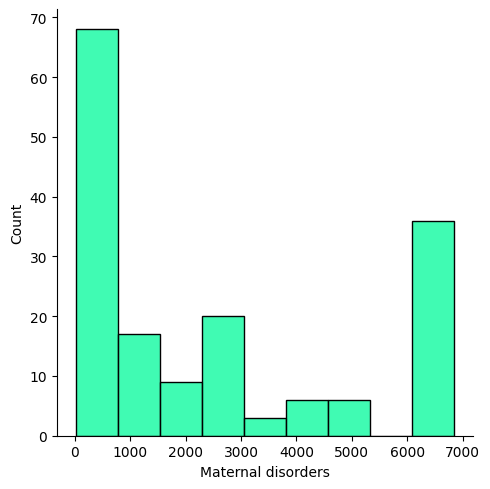

In [ ]:
sns.displot(Death_Census_Data["Maternal disorders"],color='mediumspringgreen')

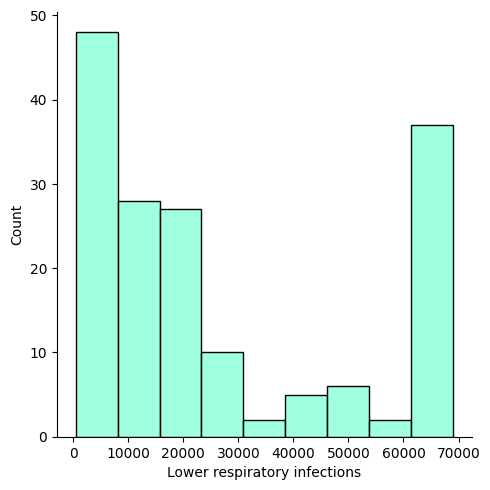

In [ ]:
sns.displot(Death_Census_Data["Lower respiratory infections"],color='aquamarine')

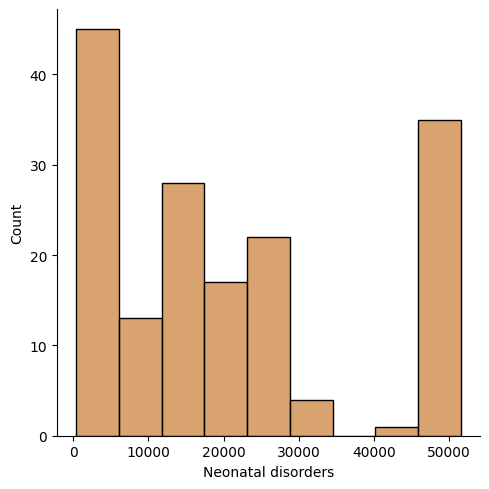

In [ ]:
sns.displot(Death_Census_Data["Neonatal disorders"],color='peru')

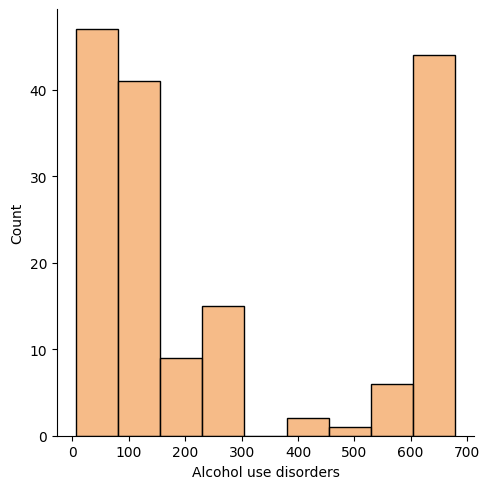

In [ ]:
sns.displot(Death_Census_Data["Alcohol use disorders"],color='sandybrown')

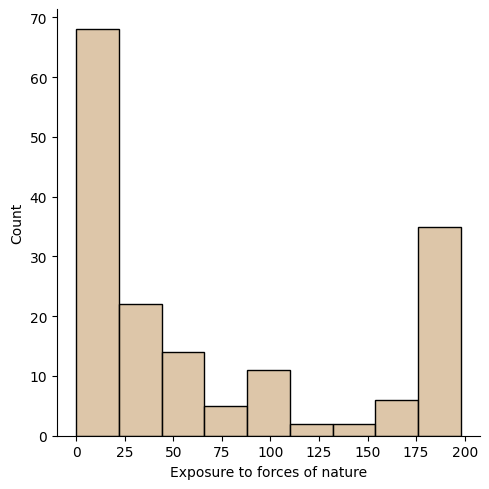

In [ ]:
sns.displot(Death_Census_Data["Exposure to forces of nature"],color='tan')

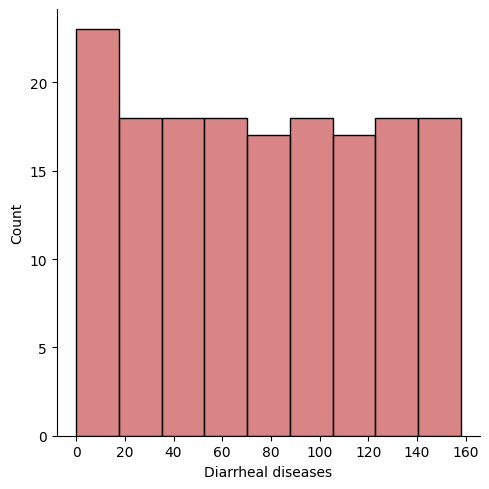

In [ ]:
sns.displot(Death_Census_Data["Diarrheal diseases"],color='indianred')

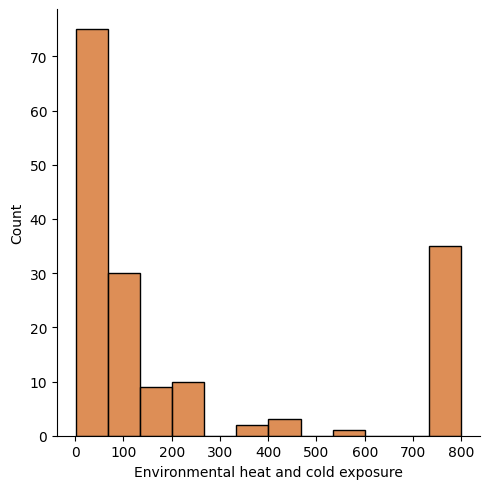

In [ ]:
sns.displot(Death_Census_Data["Environmental heat and cold exposure"],color='chocolate')

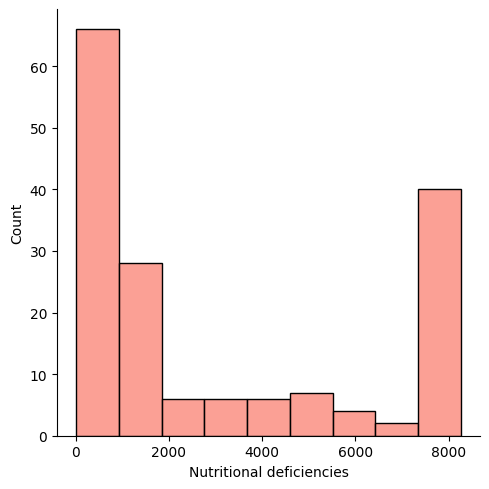

In [ ]:
sns.displot(Death_Census_Data["Nutritional deficiencies"],color='salmon')

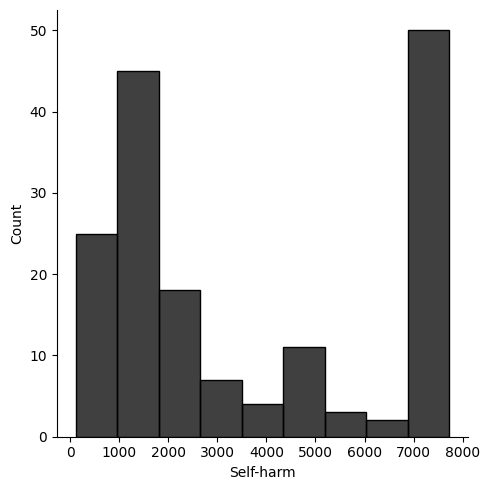

In [ ]:
sns.displot(Death_Census_Data["Self-harm"],color='black')

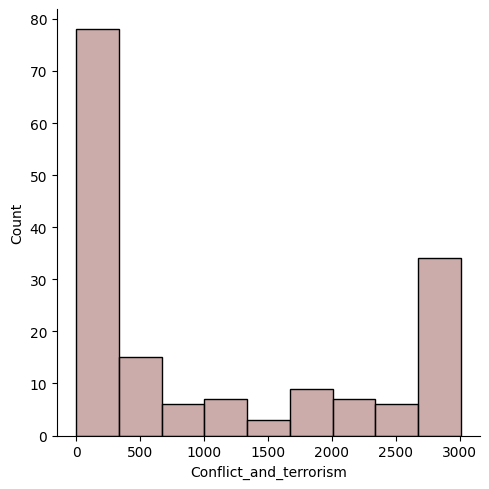

In [ ]:
sns.displot(Death_Census_Data["Conflict_and_terrorism"],color='rosybrown')

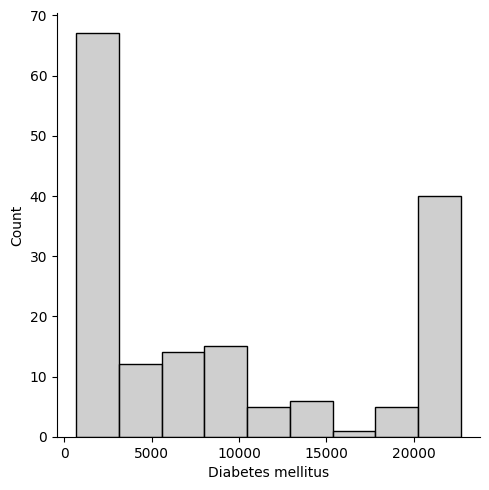

In [ ]:
sns.displot(Death_Census_Data["Diabetes mellitus"],color='silver')

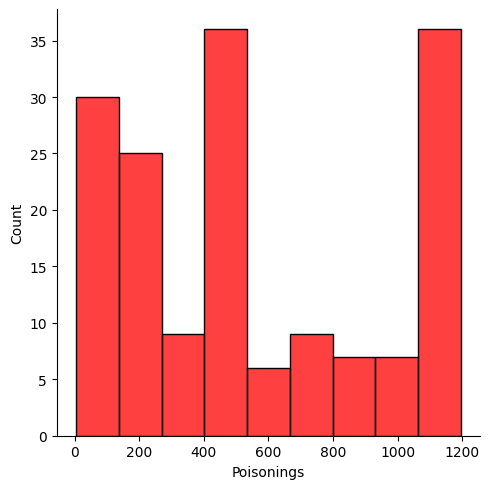

In [ ]:
sns.displot(Death_Census_Data["Poisonings"],color='red')

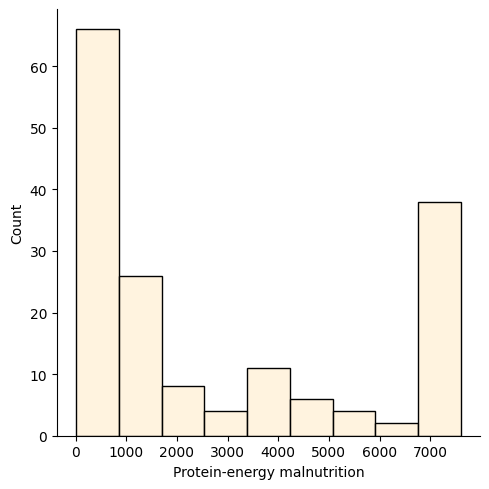

In [ ]:
sns.displot(Death_Census_Data["Protein-energy malnutrition"],color='papayawhip')

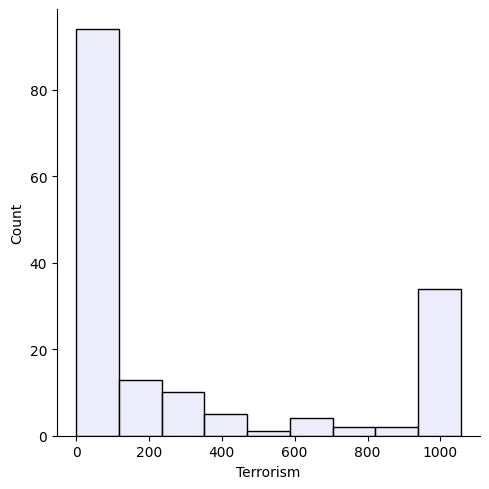

In [ ]:
sns.displot(Death_Census_Data["Terrorism"],color='lavender')

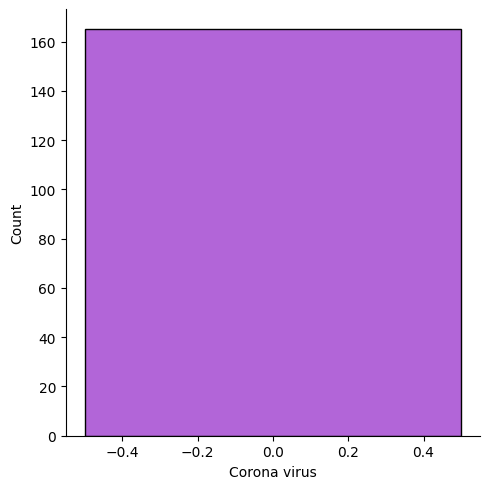

In [ ]:
sns.displot(Death_Census_Data["Corona virus"],color='darkorchid')

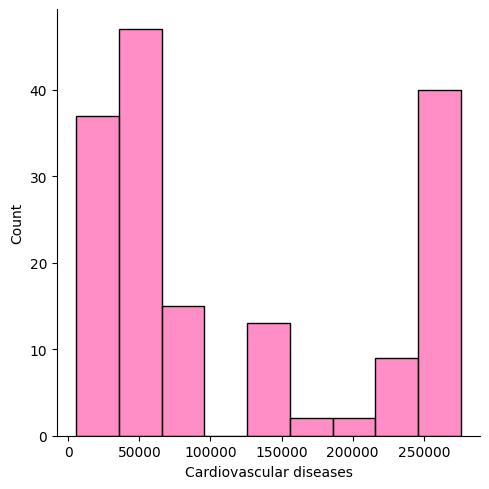

In [ ]:
sns.displot(Death_Census_Data["Cardiovascular diseases"],color='hotpink')

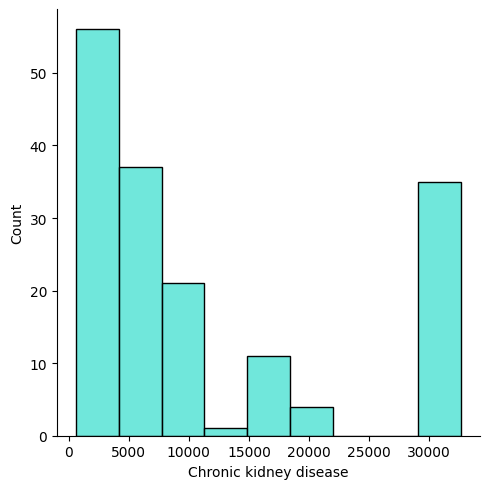

In [ ]:
sns.displot(Death_Census_Data["Chronic kidney disease"],color='turquoise')

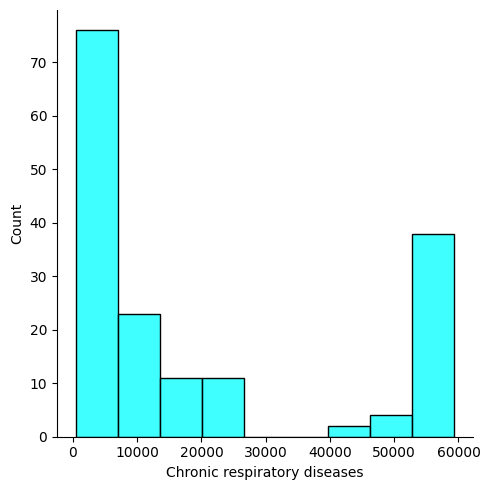

In [ ]:
sns.displot(Death_Census_Data["Chronic respiratory diseases"],color='cyan')

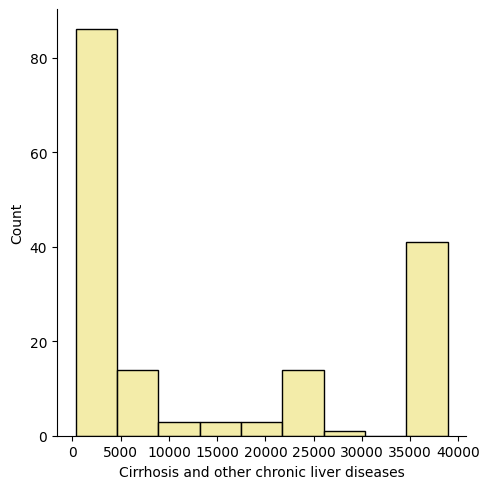

In [ ]:
sns.displot(Death_Census_Data["Cirrhosis and other chronic liver diseases"],color='khaki')

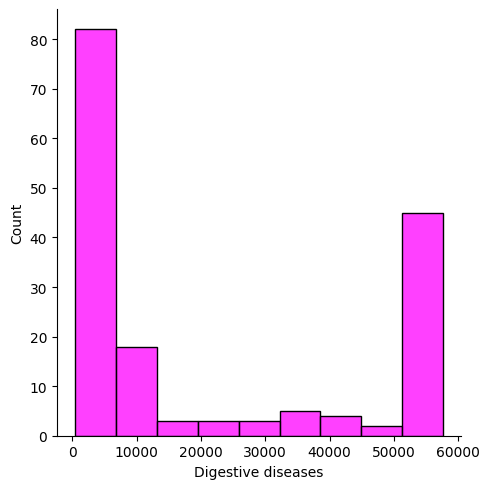

In [ ]:
sns.displot(Death_Census_Data["Digestive diseases"],color='magenta')

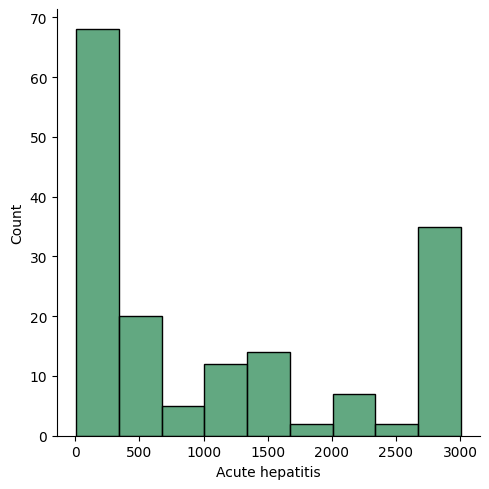

In [ ]:
sns.displot(Death_Census_Data["Acute hepatitis"],color='seagreen')

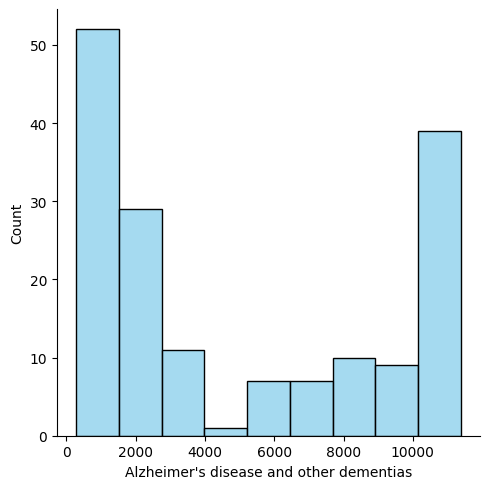

In [ ]:
sns.displot(Death_Census_Data["Alzheimer's disease and other dementias"],color='skyblue')

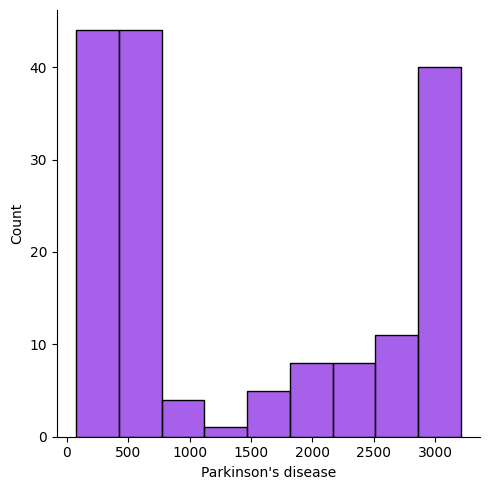

In [ ]:
sns.displot(Death_Census_Data["Parkinson's disease"],color='blueviolet')

FROM THE GRAPH WE CAN CONCLUDE THAT THE DISEASE CAUSED MAXIMUM NUMBER OF DEATH OVER YEARS IS TUBERCULOSIS

COUNT PLOT

CHECKING FOF ABNORMALITY IF ANY

<Axes: ylabel='count'>

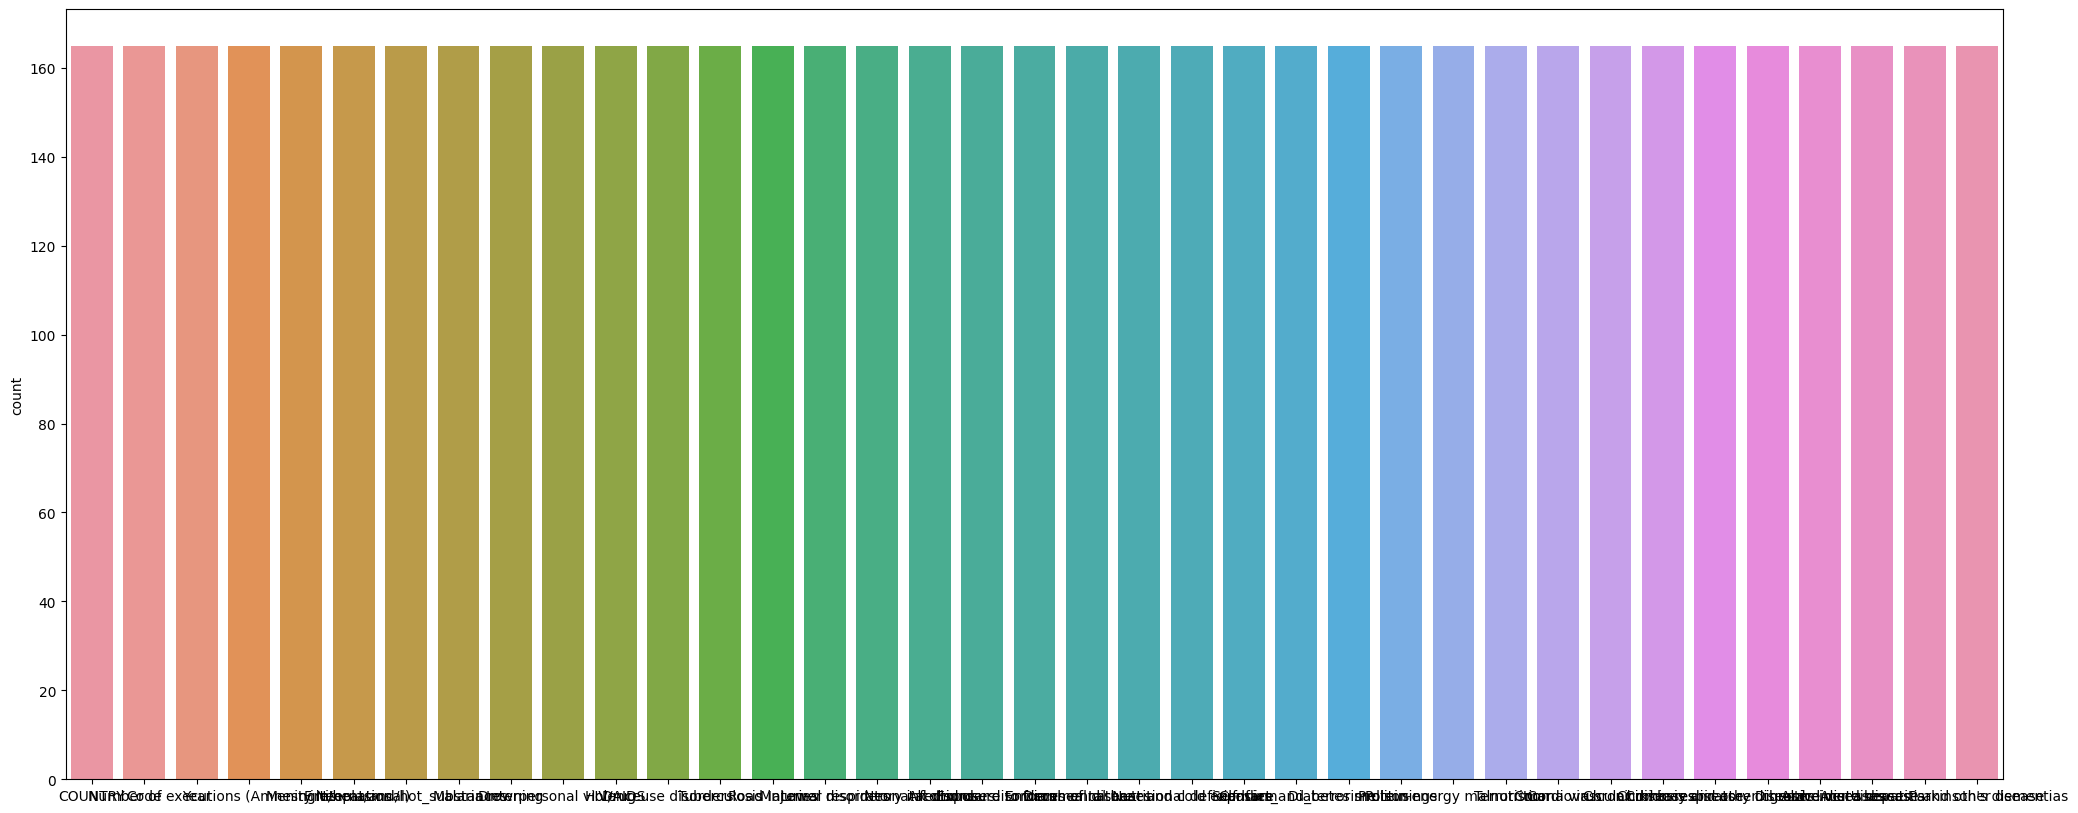

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(data=Death_Census_Data)

SPLITING THE DATA

X = DEPENDENT DATA [ ALL OTHERS EXCEPT MALARIA]

Y = INDEPENDENT DATA [TUBERCULOSIS]

In [ ]:
X=Death_Census_Data.drop(['Tuberculosis','COUNTRY','Code'],axis=1)
print(X)

      Year  Number of executions (Amnesty International)  Meningitis  \
17    2007                                          15.0      2933.0   
18    2008                                          17.0      2731.0   
19    2009                                           0.0      2460.0   
21    2011                                           2.0      2327.0   
22    2012                                          14.0      2254.0   
...    ...                                           ...         ...   
7131  2011                                          41.0       537.0   
7132  2012                                          28.0       518.0   
7133  2013                                          13.0       508.0   
7134  2014                                          22.0       499.0   
7135  2014                                           8.0       509.0   

      Neoplasms  Fire/heat/and/hot_substances  Malaria  Drowning  \
17      15925.0                         481.0    393.0    2127.0   

In [ ]:
Y=Death_Census_Data['Tuberculosis']
print(Y)

17      4995.0
18      4790.0
19      4579.0
21      4259.0
22      4122.0
         ...  
7131     867.0
7132     844.0
7133     851.0
7134     850.0
7135     877.0
Name: Tuberculosis, Length: 165, dtype: float64


TRAINING THE DATA

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X_train)
print(Y_train)

      Year  Number of executions (Amnesty International)  Meningitis  \
4840  2009                                           0.0        54.0   
6416  2009                                           2.0      1125.0   
3138  2014                                           2.0        72.0   
7127  2007                                          15.0       706.0   
6156  2013                                          21.0       952.0   
...    ...                                           ...         ...   
3105  2014                                           3.0       401.0   
2841  2014                                           1.0      4507.0   
565   2011                                           2.0        72.0   
3099  2009                                           7.0       492.0   
516   2011                                           5.0      3328.0   

      Neoplasms  Fire/heat/and/hot_substances  Malaria  Drowning  \
4840     2575.0                          42.0      0.0      55.0   

CORRELATION AND HEAT MAP

In [ ]:
correlation=Death_Census_Data.corr()
print(correlation)

                                              COUNTRY  Code      Year  \
COUNTRY                                           NaN   NaN       NaN   
Code                                              NaN   NaN       NaN   
Year                                              NaN   NaN  1.000000   
Number of executions (Amnesty International)      NaN   NaN  0.138912   
Meningitis                                        NaN   NaN -0.180599   
Neoplasms                                         NaN   NaN  0.031487   
Fire/heat/and/hot_substances                      NaN   NaN -0.068986   
Malaria                                           NaN   NaN -0.142495   
Drowning                                          NaN   NaN -0.082089   
Interpersonal violence                            NaN   NaN -0.093058   
HIV/AIDS                                          NaN   NaN -0.080454   
Drug use disorders                                NaN   NaN  0.077317   
Tuberculosis                                      N

<Axes: >

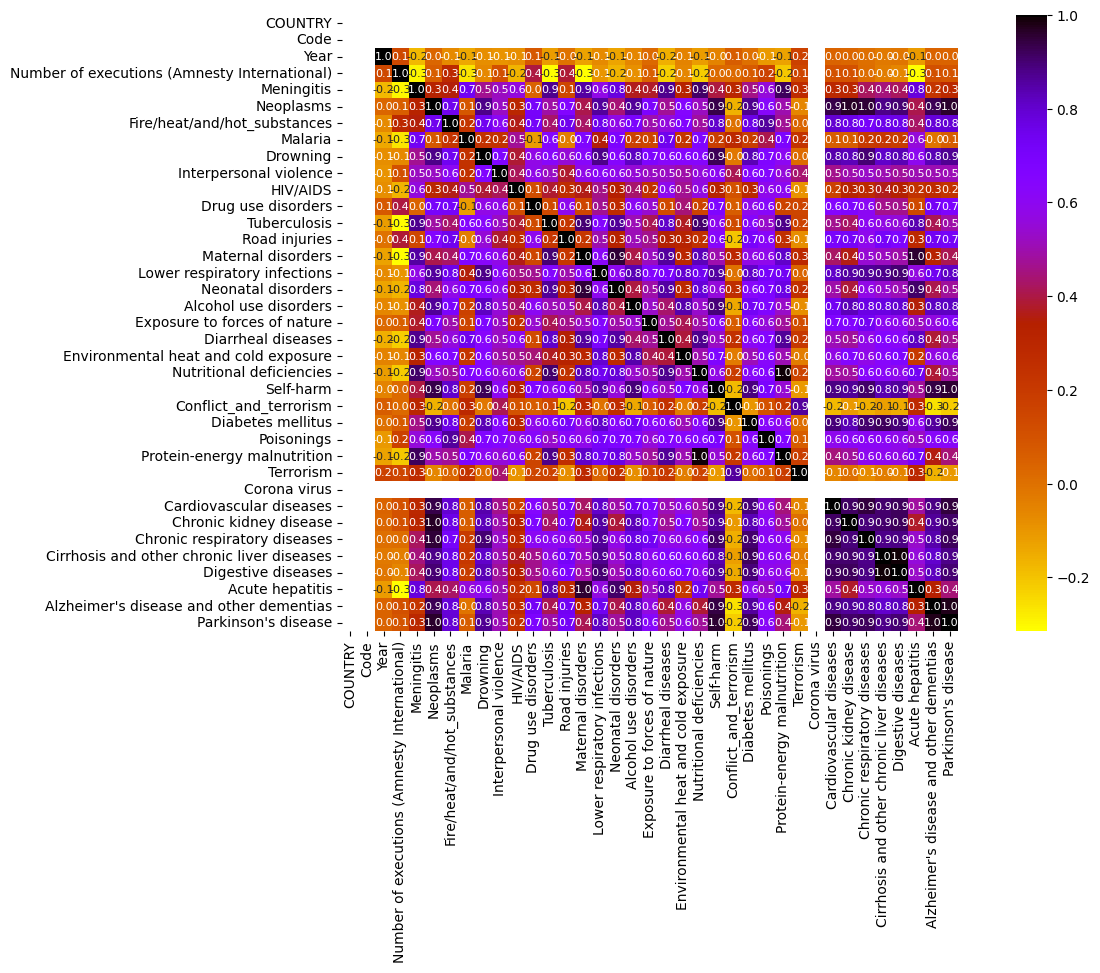

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation,cbar=True,square=True,cmap="gnuplot_r",annot=True,annot_kws={'size':8},fmt='.1f')

MODEL BUILDING AND ACCURACY CHECKING

In [ ]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,Y_train)
print('accuracy of linear regression on training data:{:2f}'.format(linreg.score(X_train,Y_train)))
print('accuracy of linear regression on test data:{:2f}'.format(linreg.score(X_test,Y_test)))

accuracy of linear regression on training data:0.989673
accuracy of linear regression on test data:0.977606


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
print('accuracy of logistic regression on training set:{:2f}'.format(logreg.score(X_train,Y_train)))
print('accuracy of logistic regression on test set:{:2f}'.format(logreg.score(X_test,Y_test)))

accuracy of logistic regression on training set:0.689394
accuracy of logistic regression on test set:0.303030


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier().fit(X_train,Y_train)
print('accuracy of decision tree classifier on training set:{:2f}'.format(clf.score(X_train,Y_train)))
print('accuracy of decision tree classifier on test set:{:2f}'.format(clf.score(X_test,Y_test)))

accuracy of decision tree classifier on training set:1.000000
accuracy of decision tree classifier on test set:0.303030


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
print('accuracy of K-NN Classifier on training set:{:2f}'.format(knn.score(X_train,Y_train)))
print('accuracy of K-NN Classifier on test set:{:2f}'.format(knn.score(X_test,Y_test)))

accuracy of K-NN Classifier on training set:0.371212
accuracy of K-NN Classifier on test set:0.303030


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,Y_train)
print('accuracy of GNB classifier on training set:{:2f}'.format(gnb.score(X_train,Y_train)))
print('accuracy of GNB classifier on test set:{:2f}'.format(gnb.score(X_test,Y_test)))

accuracy of GNB classifier on training set:1.000000
accuracy of GNB classifier on test set:0.303030


In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,Y_train)
print('accuracy of SVM classifier on training set:{:2f}'.format(svm.score(X_train,Y_train)))
print('accuracy of SVM classifier on test set:{:2f}'.format(svm.score(X_test,Y_test)))

accuracy of SVM classifier on training set:0.250000
accuracy of SVM classifier on test set:0.303030


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)
test_data_prediction=regressor.predict(X_test)
print(test_data_prediction)

[31182.     724.65 31182.   17167.58 31182.    4325.25  3893.85  2145.5
  1156.3  31173.94  4668.8  16703.74 17099.12  6197.34  3740.14 31081.34
 31182.   31056.47 30902.01  4120.52  7448.79  6299.67   986.41 31173.94
  7420.69  1486.51  1090.85   934.     987.72   994.37   878.26  1175.24
 31173.94]


In [ ]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.9496879223088639


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()
gradient_booster.fit(X_train,Y_train)
print('accuracy of GradientBooster on training set:{:2f}'.format(gradient_booster.score(X_train,Y_train)))
print('accuracy of GradientBooster on test set:{:2f}'.format(gradient_booster.score(X_test,Y_test)))

accuracy of GradientBooster on training set:1.000000
accuracy of GradientBooster on test set:0.303030


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)
extra_tree_forest.fit(X,Y)
print('accuracy of ExtraTreeclassifier on training set:{:2f}'.format(extra_tree_forest.score(X_train,Y_train)))
print('accuracy of ExtraTreeclassifier on test set:{:2f}'.format(extra_tree_forest.score(X_test,Y_test)))

accuracy of ExtraTreeclassifier on training set:1.000000
accuracy of ExtraTreeclassifier on test set:1.000000


PREDICTION

In [ ]:
input_data=(2007,15,2933,15925,481,393,2127,3657,148,252,7425,4990,27672,23890,111,296,9320,57,2488,1310,8220,3189,513,2439,1199,0,53962,4490,7222,3346,6458,3437,1402,450)
input_data_as_numpy_array=np.array(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=extra_tree_forest.predict(input_data_reshaped)

if(prediction[0]==0):
   print('PREDICTION IS WRONG')
else:
  print('PREDICTION IS CORRECT')

PREDICTION IS CORRECT


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


## FROM THE MODEL AND PREDICTION WITH EXTRA TREE CLASSIFIER IT IS CONCLUDED THAT THE PREDICTION IS CORRECT. HENCE THE MOST NUMBER OF DEATH CAUSED FROM 1990 TO 2022 WORLDWIDE WAS CAUSED BY ***TUBERCULOSIS***.